# Classificação de Dados de Telecomunicações

## Conjunto de dados de rotatividade de clientes da Orange Telecom limpo



**Objetivo**


"Preveja o comportamento para reter clientes. Você pode analisar todos os dados relevantes dos clientes e desenvolver programas focados em retenção de clientes."


**Base de Dados**

O conjunto de dados de churn da Orange Telecom, que consiste em dados de atividade do cliente (recursos) limpos, juntamente com um rótulo de churn que especifica se o cliente cancelou a assinatura, será usado para desenvolver modelos preditivos. Dois conjuntos de dados estão disponíveis aqui: os conjuntos de dados churn-80 e churn-20 podem ser baixados.

Os dois conjuntos são do mesmo lote, mas foram divididos em uma proporção de 80/20. Como mais dados costumam ser desejáveis ​​para o desenvolvimento de modelos de ML, vamos usar o conjunto maior (ou seja, churn-80) para fins de treinamento e validação cruzada, e o conjunto menor (ou seja, churn-20) para testes finais e avaliação de desempenho do modelo.


fonte: https://www.kaggle.com/datasets/mnassrib/telecom-churn-datasets

Para explorar esse tipo de modelo e aprender mais sobre o assunto.



**Cada linha representa um cliente; cada coluna contém os atributos do cliente. Os conjuntos de dados possuem os seguintes atributos ou características:**

Estado: string
    
    
Comprimento da conta: inteiro
    
    
Código de área: inteiro
    
    
Plano internacional: string
    
    
Plano de correio de voz: string
    
    
Número de mensagens vmail: inteiro
    
    
Total de minutos do dia: o dobro
    
    
Total de chamadas diárias: inteiro
    
    
Valor total da diária: o dobro
    
    
Total de minutos noturnos: o dobro
    
    
Total de chamadas de véspera: inteiro
    
    
Total da noite: o dobro
    
    
Total de minutos noturnos: o dobro
    
    
Total de chamadas noturnas: inteiro
    
    
Valor total da diária: duplo
    
    
Total de minutos internacionais: o dobro
    
    
Total de chamadas intl: inteiro
    
    
Total da tarifa internacional: o dobro
    
    
Chamadas de atendimento ao cliente: inteiro
    
    
Rotação: string
    
    

**A coluna "Churn" é o alvo a ser previsto.**

# Análise Explorátoria

## Visualizando os Dados de Treino

In [1]:
import pandas as pd

dados = pd.read_csv("C:/FIAP/Alura/DATA_SCIENCE/dados_telecomunicações_kaggle/churn-bigml-80.csv")

dados.head()

State  Account length  Area code International plan Voice mail plan  \
0    KS             128        415                 No             Yes   
1    OH             107        415                 No             Yes   
2    NJ             137        415                 No              No   
3    OH              84        408                Yes              No   
4    OK              75        415                Yes              No   

   Number vmail messages  Total day minutes  Total day calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0             45.07              197.4               99             16.78   
1             27.47              195.5              103             16.62   
2             41.38              121.2              110             10.30   
3             50.90               61.9               88              5.26   
4             28.34              148.3              122             12.61   

   Total night minutes  Total night calls  Total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   Total intl minutes  Total intl calls  Total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   Customer service calls  Churn  
0                       1  False  
1                       1  False  
2                       0  False  
3                       2  False  
4                       3  False

In [2]:
print('Quantidade de Linhas e Colunas nos Dados de Treino é: ',dados.shape)

Quantidade de Linhas e Colunas nos Dados de Treino é:  (2666, 20)


Renomeando as colunas

In [3]:
dados.columns = ['Estado', 'Comprimento da conta', 'Código de área', 'Plano internacional', 'Plano de correio de voz',
                'Número de mensagens vmail', 'Total de minutos do dia', 'Total de chamadas diárias', 'Valor total da diária',
                'Total de minutos noturnos', 'Total de chamadas de véspera', 'Total da noite', 'Total de minutos noturnos', 
                'Total de chamadas noturnas', 'Valor total da diária', 'Total de minutos internacionais', 'Total de chamadas intl',
                'Total da tarifa internacional', 'Chamadas de atendimento ao cliente', 'Churn']

In [4]:
dados.head()

Estado  Comprimento da conta  Código de área Plano internacional  \
0     KS                   128             415                  No   
1     OH                   107             415                  No   
2     NJ                   137             415                  No   
3     OH                    84             408                 Yes   
4     OK                    75             415                 Yes   

  Plano de correio de voz  Número de mensagens vmail  Total de minutos do dia  \
0                     Yes                         25                    265.1   
1                     Yes                         26                    161.6   
2                      No                          0                    243.4   
3                      No                          0                    299.4   
4                      No                          0                    166.7   

   Total de chamadas diárias  Valor total da diária  \
0                        110                  45.07   
1                        123                  27.47   
2                        114                  41.38   
3                         71                  50.90   
4                        113                  28.34   

   Total de minutos noturnos  Total de chamadas de véspera  Total da noite  \
0                      197.4                            99           16.78   
1                      195.5                           103           16.62   
2                      121.2                           110           10.30   
3                       61.9                            88            5.26   
4                      148.3                           122           12.61   

   Total de minutos noturnos  Total de chamadas noturnas  \
0                      244.7                          91   
1                      254.4                         103   
2                      162.6                         104   
3                      196.9                          89   
4                      186.9                         121   

   Valor total da diária  Total de minutos internacionais  \
0                  11.01                             10.0   
1                  11.45                             13.7   
2                   7.32                             12.2   
3                   8.86                              6.6   
4                   8.41                             10.1   

   Total de chamadas intl  Total da tarifa internacional  \
0                       3                           2.70   
1                       3                           3.70   
2                       5                           3.29   
3                       7                           1.78   
4                       3                           2.73   

   Chamadas de atendimento ao cliente  Churn  
0                                   1  False  
1                                   1  False  
2                                   0  False  
3                                   2  False  
4                                   3  False

## Visualizando os Dados de Teste

In [5]:
dados1 = pd.read_csv("C:/FIAP/Alura/DATA_SCIENCE/dados_telecomunicações_kaggle/churn-bigml-20.csv")

dados1.head()

State  Account length  Area code International plan Voice mail plan  \
0    LA             117        408                 No              No   
1    IN              65        415                 No              No   
2    NY             161        415                 No              No   
3    SC             111        415                 No              No   
4    HI              49        510                 No              No   

   Number vmail messages  Total day minutes  Total day calls  \
0                      0              184.5               97   
1                      0              129.1              137   
2                      0              332.9               67   
3                      0              110.4              103   
4                      0              119.3              117   

   Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0             31.37              351.6               80             29.89   
1             21.95              228.5               83             19.42   
2             56.59              317.8               97             27.01   
3             18.77              137.3              102             11.67   
4             20.28              215.1              109             18.28   

   Total night minutes  Total night calls  Total night charge  \
0                215.8                 90                9.71   
1                208.8                111                9.40   
2                160.6                128                7.23   
3                189.6                105                8.53   
4                178.7                 90                8.04   

   Total intl minutes  Total intl calls  Total intl charge  \
0                 8.7                 4               2.35   
1                12.7                 6               3.43   
2                 5.4                 9               1.46   
3                 7.7                 6               2.08   
4                11.1                 1               3.00   

   Customer service calls  Churn  
0                       1  False  
1                       4   True  
2                       4   True  
3                       2  False  
4                       1  False

In [6]:
print('Quantidade de Linhas e Colunas nos Dados de Teste é : ',dados1.shape)

Quantidade de Linhas e Colunas nos Dados de Teste é :  (667, 20)


Renomeando as colunas

In [7]:
dados1.columns = ['Estado', 'Comprimento da conta', 'Código de área', 'Plano internacional', 'Plano de correio de voz',
                'Número de mensagens vmail', 'Total de minutos do dia', 'Total de chamadas diárias', 'Valor total da diária',
                'Total de minutos noturnos', 'Total de chamadas de véspera', 'Total da noite', 'Total de minutos noturnos', 
                'Total de chamadas noturnas', 'Valor total da diária', 'Total de minutos internacionais', 'Total de chamadas intl',
                'Total da tarifa internacional', 'Chamadas de atendimento ao cliente', 'Churn']

In [8]:
dados1.head()

Estado  Comprimento da conta  Código de área Plano internacional  \
0     LA                   117             408                  No   
1     IN                    65             415                  No   
2     NY                   161             415                  No   
3     SC                   111             415                  No   
4     HI                    49             510                  No   

  Plano de correio de voz  Número de mensagens vmail  Total de minutos do dia  \
0                      No                          0                    184.5   
1                      No                          0                    129.1   
2                      No                          0                    332.9   
3                      No                          0                    110.4   
4                      No                          0                    119.3   

   Total de chamadas diárias  Valor total da diária  \
0                         97                  31.37   
1                        137                  21.95   
2                         67                  56.59   
3                        103                  18.77   
4                        117                  20.28   

   Total de minutos noturnos  Total de chamadas de véspera  Total da noite  \
0                      351.6                            80           29.89   
1                      228.5                            83           19.42   
2                      317.8                            97           27.01   
3                      137.3                           102           11.67   
4                      215.1                           109           18.28   

   Total de minutos noturnos  Total de chamadas noturnas  \
0                      215.8                          90   
1                      208.8                         111   
2                      160.6                         128   
3                      189.6                         105   
4                      178.7                          90   

   Valor total da diária  Total de minutos internacionais  \
0                   9.71                              8.7   
1                   9.40                             12.7   
2                   7.23                              5.4   
3                   8.53                              7.7   
4                   8.04                             11.1   

   Total de chamadas intl  Total da tarifa internacional  \
0                       4                           2.35   
1                       6                           3.43   
2                       9                           1.46   
3                       6                           2.08   
4                       1                           3.00   

   Chamadas de atendimento ao cliente  Churn  
0                                   1  False  
1                                   4   True  
2                                   4   True  
3                                   2  False  
4                                   1  False

## Verificação de Valores Faltantes - dados de Treino

In [9]:
dados.isnull().sum()

Estado                                0
Comprimento da conta                  0
Código de área                        0
Plano internacional                   0
Plano de correio de voz               0
Número de mensagens vmail             0
Total de minutos do dia               0
Total de chamadas diárias             0
Valor total da diária                 0
Total de minutos noturnos             0
Total de chamadas de véspera          0
Total da noite                        0
Total de minutos noturnos             0
Total de chamadas noturnas            0
Valor total da diária                 0
Total de minutos internacionais       0
Total de chamadas intl                0
Total da tarifa internacional         0
Chamadas de atendimento ao cliente    0
Churn                                 0
dtype: int64

In [10]:
print('Quantidade de Valores Faltantes no Dados de Treino: ', dados.isnull().sum().sum() )

Quantidade de Valores Faltantes no Dados de Treino:  0


In [11]:
#verificando o tipo de dado de cada coluna
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Estado                              2666 non-null   object 
 1   Comprimento da conta                2666 non-null   int64  
 2   Código de área                      2666 non-null   int64  
 3   Plano internacional                 2666 non-null   object 
 4   Plano de correio de voz             2666 non-null   object 
 5   Número de mensagens vmail           2666 non-null   int64  
 6   Total de minutos do dia             2666 non-null   float64
 7   Total de chamadas diárias           2666 non-null   int64  
 8   Valor total da diária               2666 non-null   float64
 9   Total de minutos noturnos           2666 non-null   float64
 10  Total de chamadas de véspera        2666 non-null   int64  
 11  Total da noite                      2666 no

## Verificação de Valores Faltantes - dados de Teste

In [12]:
dados1.isnull().sum()

Estado                                0
Comprimento da conta                  0
Código de área                        0
Plano internacional                   0
Plano de correio de voz               0
Número de mensagens vmail             0
Total de minutos do dia               0
Total de chamadas diárias             0
Valor total da diária                 0
Total de minutos noturnos             0
Total de chamadas de véspera          0
Total da noite                        0
Total de minutos noturnos             0
Total de chamadas noturnas            0
Valor total da diária                 0
Total de minutos internacionais       0
Total de chamadas intl                0
Total da tarifa internacional         0
Chamadas de atendimento ao cliente    0
Churn                                 0
dtype: int64

In [13]:
print('Quantidade de Valores Faltantes no Dados de Teste: ', dados1.isnull().sum().sum() )

Quantidade de Valores Faltantes no Dados de Teste:  0


In [14]:
#verificando o tipo de dado de cada coluna

dados1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Estado                              667 non-null    object 
 1   Comprimento da conta                667 non-null    int64  
 2   Código de área                      667 non-null    int64  
 3   Plano internacional                 667 non-null    object 
 4   Plano de correio de voz             667 non-null    object 
 5   Número de mensagens vmail           667 non-null    int64  
 6   Total de minutos do dia             667 non-null    float64
 7   Total de chamadas diárias           667 non-null    int64  
 8   Valor total da diária               667 non-null    float64
 9   Total de minutos noturnos           667 non-null    float64
 10  Total de chamadas de véspera        667 non-null    int64  
 11  Total da noite                      667 non-n

## Algumas medidas Estatísticas - dados de Treino

In [15]:
dados.describe().round(2)

Comprimento da conta  Código de área  Número de mensagens vmail  \
count               2666.00         2666.00                    2666.00   
mean                 100.62          437.44                       8.02   
std                   39.56           42.52                      13.61   
min                    1.00          408.00                       0.00   
25%                   73.00          408.00                       0.00   
50%                  100.00          415.00                       0.00   
75%                  127.00          510.00                      19.00   
max                  243.00          510.00                      50.00   

       Total de minutos do dia  Total de chamadas diárias  \
count                  2666.00                    2666.00   
mean                    179.48                     100.31   
std                      54.21                      19.99   
min                       0.00                       0.00   
25%                     143.40                      87.00   
50%                     179.95                     101.00   
75%                     215.90                     114.00   
max                     350.80                     160.00   

       Valor total da diária  Total de minutos noturnos  \
count                2666.00                    2666.00   
mean                   30.51                     200.39   
std                     9.22                      50.95   
min                     0.00                       0.00   
25%                    24.38                     165.30   
50%                    30.59                     200.90   
75%                    36.70                     235.10   
max                    59.64                     363.70   

       Total de chamadas de véspera  Total da noite  \
count                       2666.00         2666.00   
mean                         100.02           17.03   
std                           20.16            4.33   
min                            0.00            0.00   
25%                           87.00           14.05   
50%                          100.00           17.08   
75%                          114.00           19.98   
max                          170.00           30.91   

       Total de minutos noturnos  Total de chamadas noturnas  \
count                    2666.00                     2666.00   
mean                      201.17                      100.11   
std                        50.78                       19.42   
min                        43.70                       33.00   
25%                       166.92                       87.00   
50%                       201.15                      100.00   
75%                       236.48                      113.00   
max                       395.00                      166.00   

       Valor total da diária  Total de minutos internacionais  \
count                2666.00                          2666.00   
mean                    9.05                            10.24   
std                     2.29                             2.79   
min                     1.97                             0.00   
25%                     7.51                             8.50   
50%                     9.05                            10.20   
75%                    10.64                            12.10   
max                    17.77                            20.00   

       Total de chamadas intl  Total da tarifa internacional  \
count                 2666.00                        2666.00   
mean                     4.47                           2.76   
std                      2.46                           0.75   
min                      0.00                           0.00   
25%                      3.00                           2.30   
50%                      4.00                           2.75   
75%                      6.00                           3.27   
max                     20.00                           5.40   

       Chamadas de ate

## Algumas medidas Estatísticas - dados de Teste

In [16]:
dados1.describe().round(2)

Comprimento da conta  Código de área  Número de mensagens vmail  \
count                667.00          667.00                     667.00   
mean                 102.84          436.16                       8.41   
std                   40.82           41.78                      13.99   
min                    1.00          408.00                       0.00   
25%                   76.00          408.00                       0.00   
50%                  102.00          415.00                       0.00   
75%                  128.00          415.00                      20.00   
max                  232.00          510.00                      51.00   

       Total de minutos do dia  Total de chamadas diárias  \
count                   667.00                     667.00   
mean                    180.95                     100.94   
std                      55.51                      20.40   
min                      25.90                      30.00   
25%                     146.25                      87.50   
50%                     178.30                     101.00   
75%                     220.70                     115.00   
max                     334.30                     165.00   

       Valor total da diária  Total de minutos noturnos  \
count                 667.00                     667.00   
mean                   30.76                     203.36   
std                     9.44                      49.72   
min                     4.40                      48.10   
25%                    24.86                     171.05   
50%                    30.31                     203.70   
75%                    37.52                     236.45   
max                    56.83                     361.80   

       Total de chamadas de véspera  Total da noite  \
count                        667.00          667.00   
mean                         100.48           17.29   
std                           18.95            4.23   
min                           37.00            4.09   
25%                           88.00           14.54   
50%                          101.00           17.31   
75%                          113.00           20.10   
max                          168.00           30.75   

       Total de minutos noturnos  Total de chamadas noturnas  \
count                     667.00                      667.00   
mean                      199.69                      100.11   
std                        49.76                       20.17   
min                        23.20                       42.00   
25%                       167.95                       86.00   
50%                       201.60                      100.00   
75%                       231.50                      113.50   
max                       367.70                      175.00   

       Valor total da diária  Total de minutos internacionais  \
count                 667.00                           667.00   
mean                    8.99                            10.24   
std                     2.24                             2.81   
min                     1.04                             0.00   
25%                     7.56                             8.60   
50%                     9.07                            10.50   
75%                    10.42                            12.05   
max                    16.55                            18.30   

       Total de chamadas intl  Total da tarifa internacional  \
count                  667.00                         667.00   
mean                     4.53                           2.76   
std                      2.48                           0.76   
min                      0.00                           0.00   
25%                      3.00                           2.32   
50%                      4.00                           2.84   
75%                      6.00                           3.26   
max                     18.00                           4.94   

       Chamadas de ate

## Explorando Variáveis Categoricas - dados de Treino

In [17]:
dados.Churn.unique()

array([False,  True])

In [18]:
import plotly.express as px

In [19]:
px.histogram(dados, x  = 'Churn', text_auto = True)

In [20]:
print('A porcentagem de Churn é: ', (388/2666)*100)

A porcentagem de Churn é:  14.553638409602401


In [21]:
dados.Estado.unique()

array(['KS', 'OH', 'NJ', 'OK', 'AL', 'MA', 'MO', 'WV', 'RI', 'IA', 'MT',
       'ID', 'VT', 'VA', 'TX', 'FL', 'CO', 'AZ', 'NE', 'WY', 'IL', 'NH',
       'LA', 'GA', 'AK', 'MD', 'AR', 'WI', 'OR', 'DE', 'IN', 'UT', 'CA',
       'SD', 'NC', 'WA', 'MN', 'NM', 'NV', 'DC', 'NY', 'KY', 'ME', 'MS',
       'MI', 'SC', 'TN', 'PA', 'HI', 'ND', 'CT'], dtype=object)

In [22]:
px.histogram(dados, x  = 'Estado', text_auto = True)

In [23]:
px.histogram(dados, x  = 'Estado', text_auto = True, color = 'Churn', barmode  = 'group')

In [24]:
dados['Código de área'].unique()

array([415, 408, 510], dtype=int64)

In [25]:
px.histogram(dados, x  = 'Código de área', text_auto = True, color = 'Churn', barmode  = 'group')

In [26]:
px.histogram(dados, x  = 'Plano internacional', text_auto = True, color = 'Churn', barmode  = 'group')

In [27]:
px.histogram(dados, x  = 'Plano de correio de voz', text_auto = True, color = 'Churn', barmode  = 'group')

Informações Obtidas das Variáveis Categoricas nos Dados de Treino

No Histograma de Churn: Com um número significativamente maior de 'false' (2278) em comparação com 'true' (388). Isso sugere que a ocorrência de "churn" (saída/cancelamento de clientes, por exemplo) é menos frequente no conjunto de dados representado.


No Histograma Plano Internacional: Clientes com "Plano Internacional" (Yes) parecem ter uma taxa de churn consideravelmente maior em comparação com aqueles que não possuem um "Plano Internacional" (No). 


No Histograma de Plano de correio de Voz:  Clientes que não possuem um plano de correio de voz (No) parecem ter uma taxa de churn maior em comparação com aqueles que possuem um plano de correio de voz (Yes). 

## Explorando Variáveis Categoricas - dados de Teste

In [28]:
dados1.Churn.unique()

array([False,  True])

In [29]:
px.histogram(dados1, x  = 'Churn', text_auto = True)

In [30]:
dados1.shape

(667, 20)

In [31]:
print('A porcentagem de Churn é: ', (95/667)*100)

A porcentagem de Churn é:  14.24287856071964


In [32]:
dados1.Estado.unique()

array(['LA', 'IN', 'NY', 'SC', 'HI', 'AK', 'MI', 'ID', 'VA', 'WI', 'MN',
       'VT', 'MT', 'MA', 'KY', 'CO', 'AZ', 'CA', 'WA', 'NE', 'OH', 'MO',
       'AL', 'NH', 'NM', 'OR', 'TX', 'MS', 'WY', 'FL', 'KS', 'NC', 'SD',
       'OK', 'CT', 'RI', 'DE', 'UT', 'NV', 'DC', 'ME', 'IL', 'NJ', 'MD',
       'WV', 'PA', 'ND', 'AR', 'TN', 'IA', 'GA'], dtype=object)

In [33]:
px.histogram(dados1, x  = 'Estado', text_auto = True)

In [34]:
px.histogram(dados1, x  = 'Estado', text_auto = True, color = 'Churn', barmode  = 'group')

In [35]:
dados1['Código de área'].unique()

array([408, 415, 510], dtype=int64)

In [36]:
px.histogram(dados1, x  = 'Código de área', text_auto = True, color = 'Churn', barmode  = 'group')

In [37]:
px.histogram(dados1, x  = 'Plano internacional', text_auto = True, color = 'Churn', barmode  = 'group')

In [38]:
px.histogram(dados1, x  = 'Plano de correio de voz', text_auto = True, color = 'Churn', barmode  = 'group')

Informações Obtidas das Variáveis Categoricas nos Dados de Teste


No Histograma de Churn: Com um número significativamente maior de 'false' (572) em comparação com 'true' (95). Isso sugere que a ocorrência de "churn" (saída/cancelamento de clientes, por exemplo) é menos frequente no conjunto de dados representado.


No Histograma Plano Internacional: Clientes com "Plano Internacional" (Yes) parecem ter uma taxa de churn consideravelmente menor em comparação com aqueles que não possuem um "Plano Internacional" (No). 


No Histograma de Plano de correio de Voz:  Clientes que não possuem um plano de correio de voz (No) parecem ter uma taxa de churn maior em comparação com aqueles que possuem um plano de correio de voz (Yes). 


## Explorando Variáveis Quantitativas - Dados de Treino

In [39]:
px.histogram(dados, x  = 'Chamadas de atendimento ao cliente', text_auto = True, color = 'Churn', barmode  = 'group')

In [40]:
px.box(dados, x = 'Chamadas de atendimento ao cliente', color  = 'Churn')

In [41]:
dados.head()

Estado  Comprimento da conta  Código de área Plano internacional  \
0     KS                   128             415                  No   
1     OH                   107             415                  No   
2     NJ                   137             415                  No   
3     OH                    84             408                 Yes   
4     OK                    75             415                 Yes   

  Plano de correio de voz  Número de mensagens vmail  Total de minutos do dia  \
0                     Yes                         25                    265.1   
1                     Yes                         26                    161.6   
2                      No                          0                    243.4   
3                      No                          0                    299.4   
4                      No                          0                    166.7   

   Total de chamadas diárias  Valor total da diária  \
0                        110                  45.07   
1                        123                  27.47   
2                        114                  41.38   
3                         71                  50.90   
4                        113                  28.34   

   Total de minutos noturnos  Total de chamadas de véspera  Total da noite  \
0                      197.4                            99           16.78   
1                      195.5                           103           16.62   
2                      121.2                           110           10.30   
3                       61.9                            88            5.26   
4                      148.3                           122           12.61   

   Total de minutos noturnos  Total de chamadas noturnas  \
0                      244.7                          91   
1                      254.4                         103   
2                      162.6                         104   
3                      196.9                          89   
4                      186.9                         121   

   Valor total da diária  Total de minutos internacionais  \
0                  11.01                             10.0   
1                  11.45                             13.7   
2                   7.32                             12.2   
3                   8.86                              6.6   
4                   8.41                             10.1   

   Total de chamadas intl  Total da tarifa internacional  \
0                       3                           2.70   
1                       3                           3.70   
2                       5                           3.29   
3                       7                           1.78   
4                       3                           2.73   

   Chamadas de atendimento ao cliente  Churn  
0                                   1  False  
1                                   1  False  
2                                   0  False  
3                                   2  False  
4                                   3  False

In [42]:
dados['Comprimento da conta'].unique()

array([128, 107, 137,  84,  75, 118, 121, 147, 141,  74, 168,  95,  62,
        85,  93,  76,  73,  77, 130, 132, 174,  57,  54,  20, 142, 172,
        12,  72,  78, 136, 149,  98, 135,  34, 160,  64,  59,  97,  52,
        60,  96,  87,  81, 125, 116,  38,  40,  43, 113, 126, 150, 138,
       162,  90,  50,  82, 144,  70,  55, 106,  94, 111,  80, 104,  99,
       120, 122, 157, 103,  36, 112,  46,  41, 193,  61,  92, 131, 163,
        91, 127, 110, 117, 140,  83, 145,  56, 151, 139, 115, 146, 185,
       148,  68, 179,  67,  19, 170, 164,  51,  63,  53, 105,  66,  86,
        35,  88, 123, 100, 108,  22,  33, 114,  24, 119, 101,  49,  48,
        71, 167, 166, 158, 196, 209,  16,  39, 173, 129, 143,  89,  44,
        79,  31,  37, 159, 194, 154,  45,  32,  21, 133,  25, 224,  58,
       155,  11, 109, 165,  18, 161, 124,  30, 176,  47, 190, 152,  65,
       186, 171, 102,  28, 153, 169,  13,  42, 189,  69,  27, 134, 156,
       243,  23, 205, 200,   5,   9, 178, 181, 182, 177, 210, 18

In [43]:
px.box(dados, x = 'Comprimento da conta', color  = 'Churn')

In [44]:
px.box(dados, x = 'Número de mensagens vmail', color  = 'Churn')

In [45]:
px.box(dados, x = 'Total de minutos do dia', color  = 'Churn')

In [46]:
px.box(dados, x = 'Total de chamadas diárias', color  = 'Churn')

In [47]:
dados['Valor total da diária']

Valor total da diária  Valor total da diária
0                     45.07                  11.01
1                     27.47                  11.45
2                     41.38                   7.32
3                     50.90                   8.86
4                     28.34                   8.41
...                     ...                    ...
2661                  22.90                   9.96
2662                  26.55                  12.56
2663                  39.29                   8.61
2664                  30.74                   8.64
2665                  39.85                  10.86

[2666 rows x 2 columns]

In [48]:
px.box(dados, x = dados['Valor total da diária'].iloc[:,0], color  = 'Churn')

In [49]:
px.box(dados, x = dados['Valor total da diária'].iloc[:,1], color  = 'Churn')

In [50]:
dados['Total de minutos noturnos']

Total de minutos noturnos  Total de minutos noturnos
0                         197.4                      244.7
1                         195.5                      254.4
2                         121.2                      162.6
3                          61.9                      196.9
4                         148.3                      186.9
...                         ...                        ...
2661                      189.7                      221.4
2662                      215.5                      279.1
2663                      153.4                      191.3
2664                      288.8                      191.9
2665                      265.9                      241.4

[2666 rows x 2 columns]

In [51]:
px.box(dados, x = dados['Total de minutos noturnos'].iloc[:,0], color  = 'Churn')

In [52]:
px.box(dados, x = dados['Total de minutos noturnos'].iloc[:,1], color  = 'Churn')

In [53]:
px.box(dados, x = 'Total de chamadas de véspera', color  = 'Churn')

In [54]:
px.box(dados, x = 'Total da noite', color  = 'Churn')

In [55]:
px.box(dados, x = 'Total de chamadas noturnas', color  = 'Churn')

In [56]:
px.box(dados, x = 'Total de minutos internacionais', color  = 'Churn')

In [57]:
px.box(dados, x = 'Total de chamadas intl', color  = 'Churn')

In [58]:
px.box(dados, x = 'Total da tarifa internacional', color  = 'Churn')

Informações Obtidas das Variáveis Quantitativas nos Dados de Treino


Boxplot de Chamadas de Antendimento ao Cliente x Churn: O gráfico sugere fortemente que um maior número de chamadas de atendimento ao cliente está associado a uma maior probabilidade de churn. Clientes insatisfeitos que estão prestes a sair tendem a interagir mais com o suporte.


Boxplot de Número de Mensagens Vmail x Churn: O gráfico sugere fortemente que clientes com poucas ou nenhuma mensagem de correio de voz (particularmente aqueles com zero mensagens) têm uma propensão muito maior a churn. Inversamente, clientes que utilizam o serviço de correio de voz (com mais mensagens) tendem a permanecer.


Boxplot de Total de Minutos dia x Churn: O gráfico indica claramente que um maior "Total de minutos do dia" está associado a uma maior probabilidade de churn. Clientes que consomem muitos minutos de chamada diariamente tendem a ser mais propensos a cancelar o serviço.


Boxplot de Total de chamadas diárias x Churn | Valor Total da diária x Churn | Boxplot de Total de minutos noturnos x Churn | Boxplot de Total da noite x Churn | Boxplot de Total de chamadas noturna x Churn | Total de minutos internacionais | Total da tarifa internacional : Todos os gráficos sugere que os valores maiores das Variáveis, está associado a uma maior probabilidade de churn.



Boxplot de Total de chamadas Internacional x Churn: O gráfico indica que um " Total de chamadas Internacionais " mais alto está associado a uma menor probabilidade de churn. 




## Explorando Variáveis Quantitativas - Dados de Teste

In [59]:
px.histogram(dados1, x  = 'Chamadas de atendimento ao cliente', text_auto = True, color = 'Churn', barmode  = 'group')

In [60]:
px.box(dados1, x = 'Chamadas de atendimento ao cliente', color  = 'Churn')

In [61]:
px.box(dados1, x = 'Comprimento da conta', color  = 'Churn')

In [62]:
px.box(dados1, x = 'Número de mensagens vmail', color  = 'Churn')

In [63]:
px.box(dados1, x = 'Total de minutos do dia', color  = 'Churn')

In [64]:
px.box(dados1, x = 'Total de chamadas diárias', color  = 'Churn')

In [65]:
px.box(dados1, x = dados1['Valor total da diária'].iloc[:,0], color  = 'Churn')

In [66]:
px.box(dados1, x = dados1['Valor total da diária'].iloc[:,1], color  = 'Churn')

In [67]:
px.box(dados1, x = dados1['Total de minutos noturnos'].iloc[:,0], color  = 'Churn')

In [68]:
px.box(dados1, x = dados1['Total de minutos noturnos'].iloc[:,1], color  = 'Churn')

In [69]:
px.box(dados1, x = 'Total de chamadas de véspera', color  = 'Churn')

In [70]:
px.box(dados1, x = 'Total da noite', color  = 'Churn')

In [71]:
px.box(dados1, x = 'Total de chamadas noturnas', color  = 'Churn')

In [72]:
px.box(dados1, x = 'Total de minutos internacionais', color  = 'Churn')

In [73]:
px.box(dados1, x = 'Total de chamadas intl', color  = 'Churn')

In [74]:
px.box(dados1, x = 'Total da tarifa internacional', color  = 'Churn')

Informações Obtidas das Variáveis Quantitativas nos Dados de Treino


Boxplot de Chamadas de Antendimento ao Cliente x Churn: O gráfico sugere fortemente que um maior número de chamadas de atendimento ao cliente está associado a uma maior probabilidade de churn. Clientes insatisfeitos que estão prestes a sair tendem a interagir mais com o suporte.


Boxplot de Número de Mensagens Vmail x Churn: O gráfico sugere fortemente que clientes com poucas ou nenhuma mensagem de correio de voz (particularmente aqueles com zero mensagens) têm uma propensão muito maior a churn. Inversamente, clientes que utilizam o serviço de correio de voz (com mais mensagens) tendem a permanecer.


Boxplot de Total de Minutos dia x Churn: O gráfico indica claramente que um maior "Total de minutos do dia" está associado a uma maior probabilidade de churn. Clientes que consomem muitos minutos de chamada diariamente tendem a ser mais propensos a cancelar o serviço.


Boxplot de Total de chamadas diárias x Churn | Valor Total da diária x Churn | Boxplot de Total de minutos noturnos x Churn | Boxplot de Total da noite x Churn: Todos os gráficos sugere que os valores maiores das Variáveis, está associado a uma maior probabilidade de churn.



# Transformando os Dados

## Dados de Treino

Transformação das variáveis categoricas não: 0 e sim: 1.

In [75]:
x  = dados.drop(['Churn', 'Estado'], axis = 1)
y = dados['Churn']

In [76]:
x

Comprimento da conta  Código de área Plano internacional  \
0                      128             415                  No   
1                      107             415                  No   
2                      137             415                  No   
3                       84             408                 Yes   
4                       75             415                 Yes   
...                    ...             ...                 ...   
2661                    79             415                  No   
2662                   192             415                  No   
2663                    68             415                  No   
2664                    28             510                  No   
2665                    74             415                  No   

     Plano de correio de voz  Número de mensagens vmail  \
0                        Yes                         25   
1                        Yes                         26   
2                         No                          0   
3                         No                          0   
4                         No                          0   
...                      ...                        ...   
2661                      No                          0   
2662                     Yes                         36   
2663                      No                          0   
2664                      No                          0   
2665                     Yes                         25   

      Total de minutos do dia  Total de chamadas diárias  \
0                       265.1                        110   
1                       161.6                        123   
2                       243.4                        114   
3                       299.4                         71   
4                       166.7                        113   
...                       ...                        ...   
2661                    134.7                         98   
2662                    156.2                         77   
2663                    231.1                         57   
2664                    180.8                        109   
2665                    234.4                        113   

      Valor total da diária  Total de minutos noturnos  \
0                     45.07                      197.4   
1                     27.47                      195.5   
2                     41.38                      121.2   
3                     50.90                       61.9   
4                     28.34                      148.3   
...                     ...                        ...   
2661                  22.90                      189.7   
2662                  26.55                      215.5   
2663                  39.29                      153.4   
2664                  30.74                      288.8   
2665                  39.85                      265.9   

      Total de chamadas de véspera  Total da noite  Total de minutos noturnos  \
0                               99           16.78                      244.7   
1                              103           16.62                      254.4   
2                              110           10.30                      162.6   
3                               88            5.26                      196.9   
4                              122           12.61                      186.9   
...                            ...             ...                        ...   
2661                            68           16.12                      221.4   
2662                           126           18.32                      279.1   
2663                            55           13.04                      191.3   
2664                            58           24.55                      191.9   
2665                            82           22.60                      241.4   

      Total de chamadas noturnas  Valor total da diária  \
0                             91                  11.0

In [77]:
y

0       False
1       False
2       False
3       False
4       False
        ...  
2661    False
2662    False
2663    False
2664    False
2665    False
Name: Churn, Length: 2666, dtype: bool

In [78]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

In [79]:
one_hot = make_column_transformer((OneHotEncoder(drop = 'if_binary'),
                                  ['Plano internacional', 'Plano de correio de voz']
                                  ),
                                 remainder = 'passthrough',
                                 sparse_threshold = 0)

In [80]:
colunas = x.columns
colunas

Index(['Comprimento da conta', 'Código de área', 'Plano internacional',
       'Plano de correio de voz', 'Número de mensagens vmail',
       'Total de minutos do dia', 'Total de chamadas diárias',
       'Valor total da diária', 'Total de minutos noturnos',
       'Total de chamadas de véspera', 'Total da noite',
       'Total de minutos noturnos', 'Total de chamadas noturnas',
       'Valor total da diária', 'Total de minutos internacionais',
       'Total de chamadas intl', 'Total da tarifa internacional',
       'Chamadas de atendimento ao cliente'],
      dtype='object')

In [81]:
X = one_hot.fit_transform(x)


In [82]:
one_hot.get_feature_names_out(colunas)

array(['onehotencoder__Plano internacional_Yes',
       'onehotencoder__Plano de correio de voz_Yes',
       'remainder__Comprimento da conta', 'remainder__Código de área',
       'remainder__Número de mensagens vmail',
       'remainder__Total de minutos do dia',
       'remainder__Total de chamadas diárias',
       'remainder__Valor total da diária',
       'remainder__Total de minutos noturnos',
       'remainder__Total de chamadas de véspera',
       'remainder__Total da noite',
       'remainder__Total de minutos noturnos',
       'remainder__Total de chamadas noturnas',
       'remainder__Valor total da diária',
       'remainder__Total de minutos internacionais',
       'remainder__Total de chamadas intl',
       'remainder__Total da tarifa internacional',
       'remainder__Chamadas de atendimento ao cliente'], dtype=object)

In [83]:
pd.DataFrame(X, columns = one_hot.get_feature_names_out(colunas))

onehotencoder__Plano internacional_Yes  \
0                                        0.0   
1                                        0.0   
2                                        0.0   
3                                        1.0   
4                                        1.0   
...                                      ...   
2661                                     0.0   
2662                                     0.0   
2663                                     0.0   
2664                                     0.0   
2665                                     0.0   

      onehotencoder__Plano de correio de voz_Yes  \
0                                            1.0   
1                                            1.0   
2                                            0.0   
3                                            0.0   
4                                            0.0   
...                                          ...   
2661                                         0.0   
2662                                         1.0   
2663                                         0.0   
2664                                         0.0   
2665                                         1.0   

      remainder__Comprimento da conta  remainder__Código de área  \
0                               128.0                      415.0   
1                               107.0                      415.0   
2                               137.0                      415.0   
3                                84.0                      408.0   
4                                75.0                      415.0   
...                               ...                        ...   
2661                             79.0                      415.0   
2662                            192.0                      415.0   
2663                             68.0                      415.0   
2664                             28.0                      510.0   
2665                             74.0                      415.0   

      remainder__Número de mensagens vmail  \
0                                     25.0   
1                                     26.0   
2                                      0.0   
3                                      0.0   
4                                      0.0   
...                                    ...   
2661                                   0.0   
2662                                  36.0   
2663                                   0.0   
2664                                   0.0   
2665                                  25.0   

      remainder__Total de minutos do dia  \
0                                  265.1   
1                                  161.6   
2                                  243.4   
3                                  299.4   
4                                  166.7   
...                                  ...   
2661                               134.7   
2662                               156.2   
2663                               231.1   
2664                               180.8   
2665                               234.4   

      remainder__Total de chamadas diárias  remainder__Valor total da diária  \
0                                    110.0                             45.07   
1                                    123.0                             27.47   
2                                    114.0                             41.38   
3                                     71.0                             50.90   
4                                    113.0                             28.34   
...                                    ...                               ...   
2661                                  98.0                             22.90   
2662                                  77.0                             26.55   
2663                                  57.0                             39.29   
2664                                 109.0                             30.74   
2665                     

## Dados de Teste

In [84]:
x_teste  = dados1.drop(['Churn', 'Estado'], axis = 1)
y_teste = dados1['Churn']

In [85]:
x_teste

Comprimento da conta  Código de área Plano internacional  \
0                     117             408                  No   
1                      65             415                  No   
2                     161             415                  No   
3                     111             415                  No   
4                      49             510                  No   
..                    ...             ...                 ...   
662                   114             415                  No   
663                   106             408                  No   
664                    60             415                  No   
665                   159             415                  No   
666                   184             510                 Yes   

    Plano de correio de voz  Número de mensagens vmail  \
0                        No                          0   
1                        No                          0   
2                        No                          0   
3                        No                          0   
4                        No                          0   
..                      ...                        ...   
662                     Yes                         26   
663                     Yes                         29   
664                      No                          0   
665                      No                          0   
666                      No                          0   

     Total de minutos do dia  Total de chamadas diárias  \
0                      184.5                         97   
1                      129.1                        137   
2                      332.9                         67   
3                      110.4                        103   
4                      119.3                        117   
..                       ...                        ...   
662                    137.1                         88   
663                     83.6                        131   
664                    193.9                        118   
665                    169.8                        114   
666                    213.8                        105   

     Valor total da diária  Total de minutos noturnos  \
0                    31.37                      351.6   
1                    21.95                      228.5   
2                    56.59                      317.8   
3                    18.77                      137.3   
4                    20.28                      215.1   
..                     ...                        ...   
662                  23.31                      155.7   
663                  14.21                      203.9   
664                  32.96                       85.0   
665                  28.87                      197.7   
666                  36.35                      159.6   

     Total de chamadas de véspera  Total da noite  Total de minutos noturnos  \
0                              80           29.89                      215.8   
1                              83           19.42                      208.8   
2                              97           27.01                      160.6   
3                             102           11.67                      189.6   
4                             109           18.28                      178.7   
..                            ...             ...                        ...   
662                           125           13.23                      247.6   
663                           131           17.33                      229.5   
664                           110            7.23                      210.1   
665                           105           16.80                      193.7   
666                            84           13.57                      139.2   

     Total de chamadas noturnas  Valor total da diária  \
0                            90                   9.71   
1                           111                   9.40  

In [86]:
y_teste

0      False
1       True
2       True
3      False
4      False
       ...  
662    False
663    False
664    False
665    False
666    False
Name: Churn, Length: 667, dtype: bool

In [87]:
one_hot = make_column_transformer((OneHotEncoder(drop = 'if_binary'),
                                  ['Plano internacional', 'Plano de correio de voz']
                                  ),
                                 remainder = 'passthrough',
                                 sparse_threshold = 0)

In [88]:
colunas_teste = x_teste.columns
colunas

Index(['Comprimento da conta', 'Código de área', 'Plano internacional',
       'Plano de correio de voz', 'Número de mensagens vmail',
       'Total de minutos do dia', 'Total de chamadas diárias',
       'Valor total da diária', 'Total de minutos noturnos',
       'Total de chamadas de véspera', 'Total da noite',
       'Total de minutos noturnos', 'Total de chamadas noturnas',
       'Valor total da diária', 'Total de minutos internacionais',
       'Total de chamadas intl', 'Total da tarifa internacional',
       'Chamadas de atendimento ao cliente'],
      dtype='object')

In [89]:
X_teste = one_hot.fit_transform(x_teste)


In [90]:
one_hot.get_feature_names_out(colunas_teste)

array(['onehotencoder__Plano internacional_Yes',
       'onehotencoder__Plano de correio de voz_Yes',
       'remainder__Comprimento da conta', 'remainder__Código de área',
       'remainder__Número de mensagens vmail',
       'remainder__Total de minutos do dia',
       'remainder__Total de chamadas diárias',
       'remainder__Valor total da diária',
       'remainder__Total de minutos noturnos',
       'remainder__Total de chamadas de véspera',
       'remainder__Total da noite',
       'remainder__Total de minutos noturnos',
       'remainder__Total de chamadas noturnas',
       'remainder__Valor total da diária',
       'remainder__Total de minutos internacionais',
       'remainder__Total de chamadas intl',
       'remainder__Total da tarifa internacional',
       'remainder__Chamadas de atendimento ao cliente'], dtype=object)

In [91]:
pd.DataFrame(X_teste, columns = one_hot.get_feature_names_out(colunas_teste))

onehotencoder__Plano internacional_Yes  \
0                                       0.0   
1                                       0.0   
2                                       0.0   
3                                       0.0   
4                                       0.0   
..                                      ...   
662                                     0.0   
663                                     0.0   
664                                     0.0   
665                                     0.0   
666                                     1.0   

     onehotencoder__Plano de correio de voz_Yes  \
0                                           0.0   
1                                           0.0   
2                                           0.0   
3                                           0.0   
4                                           0.0   
..                                          ...   
662                                         1.0   
663                                         1.0   
664                                         0.0   
665                                         0.0   
666                                         0.0   

     remainder__Comprimento da conta  remainder__Código de área  \
0                              117.0                      408.0   
1                               65.0                      415.0   
2                              161.0                      415.0   
3                              111.0                      415.0   
4                               49.0                      510.0   
..                               ...                        ...   
662                            114.0                      415.0   
663                            106.0                      408.0   
664                             60.0                      415.0   
665                            159.0                      415.0   
666                            184.0                      510.0   

     remainder__Número de mensagens vmail  remainder__Total de minutos do dia  \
0                                     0.0                               184.5   
1                                     0.0                               129.1   
2                                     0.0                               332.9   
3                                     0.0                               110.4   
4                                     0.0                               119.3   
..                                    ...                                 ...   
662                                  26.0                               137.1   
663                                  29.0                                83.6   
664                                   0.0                               193.9   
665                                   0.0                               169.8   
666                                   0.0                               213.8   

     remainder__Total de chamadas diárias  remainder__Valor total da diária  \
0                                    97.0                             31.37   
1                                   137.0                             21.95   
2                                    67.0                             56.59   
3                                   103.0                             18.77   
4                                   117.0                             20.28   
..                                    ...                               ...   
662                                  88.0                             23.31   
663                                 131.0                             14.21   
664                                 118.0                             32.96   
665                                 114.0                             28.87   
666                                 105.0                             36.35   

     remainder__Total de minutos noturnos  \
0                                   351.6   
1         

## Transforma Variável Alvo - Dados de Treino

In [92]:
from sklearn.preprocessing import LabelEncoder

In [93]:
label_encoder = LabelEncoder()

In [94]:
y = label_encoder.fit_transform(y)

In [95]:
y

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [96]:
type(y)

numpy.ndarray

In [97]:
y = pd.Series(y)
y

0       0
1       0
2       0
3       0
4       0
       ..
2661    0
2662    0
2663    0
2664    0
2665    0
Length: 2666, dtype: int64

In [98]:
print(x.shape, y.shape)

(2666, 18) (2666,)


In [99]:
type(y)

pandas.core.series.Series

In [100]:
type(x)

pandas.core.frame.DataFrame

## Transforma Variável Alvo - Dados de Teste

Transformação das variável alvo, não p/ 0 e sim: p/ 1.

In [101]:
y_teste = label_encoder.fit_transform(y_teste)

In [102]:
y_teste

array([0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,

In [103]:
y_teste = pd.Series(y_teste)
y_teste

0      0
1      1
2      1
3      0
4      0
      ..
662    0
663    0
664    0
665    0
666    0
Length: 667, dtype: int64

# Ajustando Modelos

## Balaceamento do Dados de Treino

In [104]:
!pip install -U imbalanced-learn

In [105]:
from imblearn.over_sampling import SMOTE

smt = SMOTE(random_state=123, sampling_strategy=1.0)  # Instancia um objeto da classe SMOTE
X, y = smt.fit_resample(X, y)  # Realiza a reamostragem do conjunto de dados

In [106]:
x.shape

(2666, 18)

In [107]:
y.shape

(4556,)

In [108]:
type(X)

numpy.ndarray

In [109]:
type(y)

pandas.core.series.Series

In [110]:
coluna  = ['Churn']

In [111]:
X = pd.DataFrame(X, columns = colunas)
X

Comprimento da conta  Código de área  Plano internacional  \
0                 0.000000        1.000000           128.000000   
1                 0.000000        1.000000           107.000000   
2                 0.000000        0.000000           137.000000   
3                 1.000000        0.000000            84.000000   
4                 1.000000        0.000000            75.000000   
...                    ...             ...                  ...   
4551              1.000000        0.340954           127.112327   
4552              0.592822        0.000000            69.778466   
4553              0.000000        0.000000            83.442998   
4554              0.000000        0.000000            76.273618   
4555              0.000000        0.000000           155.033078   

      Plano de correio de voz  Número de mensagens vmail  \
0                  415.000000                  25.000000   
1                  415.000000                  26.000000   
2                  415.000000                   0.000000   
3                  408.000000                   0.000000   
4                  415.000000                   0.000000   
...                       ...                        ...   
4551               415.000000                  14.320078   
4552               415.000000                   0.000000   
4553               414.158251                   0.000000   
4554               414.361557                   0.000000   
4555               415.000000                   0.000000   

      Total de minutos do dia  Total de chamadas diárias  \
0                  265.100000                 110.000000   
1                  161.600000                 123.000000   
2                  243.400000                 114.000000   
3                  299.400000                  71.000000   
4                  166.700000                 113.000000   
...                       ...                        ...   
4551               133.395229                  93.295229   
4552               171.644433                 102.006192   
4553               165.993702                  80.366995   
4554               271.696733                  97.000000   
4555               346.593897                  78.689564   

      Valor total da diária  Total de minutos noturnos  \
0                 45.070000                 197.400000   
1                 27.470000                 195.500000   
2                 41.380000                 121.200000   
3                 50.900000                  61.900000   
4                 28.340000                 148.300000   
...                     ...                        ...   
4551              22.680189                 145.317394   
4552              29.178404                 162.588121   
4553              28.221208                 134.589796   
4554              46.189445                 234.046883   
4555              58.924225                 218.551397   

      Total de chamadas de véspera  Total da noite  Total de minutos noturnos  \
0                        99.000000       16.780000                 244.700000   
1                       103.000000       16.620000                 254.400000   
2                       110.000000       10.300000                 162.600000   
3                        88.000000        5.260000                 196.900000   
4                       122.000000       12.610000                 186.900000   
...                            ...             ...                        ...   
4551                    110.864810       12.354672                 230.464612   
4552                     90.742575       13.820248                 185.194553   
4553                     81.645496       11.438095                 187.664550   
4554                     90.713314       19.890259                 237.433569   
4555                    100.050884       18.574147                 252.069976   

      Total de chamadas noturnas  Valor total da diária  \
0                      91.0000

In [112]:
dados_final = pd.concat([X, y], axis=1)  # Concatena a variável target (y) com as features (X)

# Verifica se o balanceamento e a concatenação estão corretos.
dados_final.head(2)

Comprimento da conta  Código de área  Plano internacional  \
0                   0.0             1.0                128.0   
1                   0.0             1.0                107.0   

   Plano de correio de voz  Número de mensagens vmail  \
0                    415.0                       25.0   
1                    415.0                       26.0   

   Total de minutos do dia  Total de chamadas diárias  Valor total da diária  \
0                    265.1                      110.0                  45.07   
1                    161.6                      123.0                  27.47   

   Total de minutos noturnos  Total de chamadas de véspera  Total da noite  \
0                      197.4                          99.0           16.78   
1                      195.5                         103.0           16.62   

   Total de minutos noturnos  Total de chamadas noturnas  \
0                      244.7                        91.0   
1                      254.4                       103.0   

   Valor total da diária  Total de minutos internacionais  \
0                  11.01                             10.0   
1                  11.45                             13.7   

   Total de chamadas intl  Total da tarifa internacional  \
0                     3.0                            2.7   
1                     3.0                            3.7   

   Chamadas de atendimento ao cliente  0  
0                                 1.0  0  
1                                 1.0  0

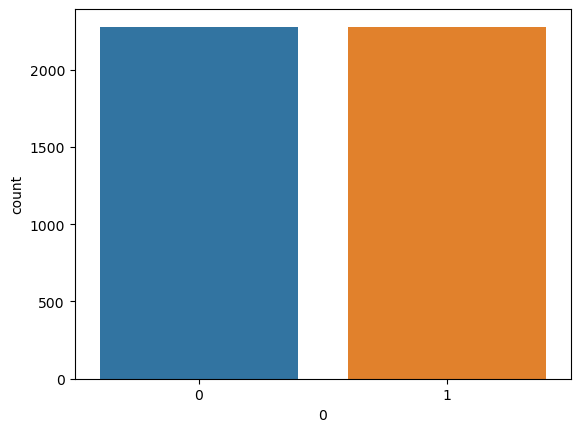

In [113]:
import seaborn as sns

ax = sns.countplot(x=dados_final.iloc[:,-1], data=dados_final)  # plotando a variável target balanceada.

## Balaceamento do Dados de Teste

In [114]:
smt = SMOTE(random_state=123, sampling_strategy=1.0)  # Instancia um objeto da classe SMOTE
X_teste, y_teste = smt.fit_resample(X_teste, y_teste)  # Realiza a reamostragem do conjunto de dados

In [115]:
type(x_teste)

pandas.core.frame.DataFrame

In [116]:
type(y_teste)

pandas.core.series.Series

In [117]:
X_teste = pd.DataFrame(X_teste, columns = colunas)
X_teste

Comprimento da conta  Código de área  Plano internacional  \
0                 0.000000        0.000000           117.000000   
1                 0.000000        0.000000            65.000000   
2                 0.000000        0.000000           161.000000   
3                 0.000000        0.000000           111.000000   
4                 0.000000        0.000000            49.000000   
...                    ...             ...                  ...   
1139              0.244660        0.000000           143.702928   
1140              0.000000        0.338582            91.519698   
1141              0.000000        0.000000            67.981952   
1142              1.000000        0.000000           111.173011   
1143              0.252674        0.252674           136.935822   

      Plano de correio de voz  Número de mensagens vmail  \
0                  408.000000                   0.000000   
1                  415.000000                   0.000000   
2                  415.000000                   0.000000   
3                  415.000000                   0.000000   
4                  510.000000                   0.000000   
...                       ...                        ...   
1139               510.000000                   0.000000   
1140               410.370075                  10.496048   
1141               411.054604                   0.000000   
1142               408.000000                   0.000000   
1143               409.768719                   3.790111   

      Total de minutos do dia  Total de chamadas diárias  \
0                  184.500000                  97.000000   
1                  129.100000                 137.000000   
2                  332.900000                  67.000000   
3                  110.400000                 103.000000   
4                  119.300000                 117.000000   
...                       ...                        ...   
1139               181.617245                 101.042722   
1140                87.194492                 113.598431   
1141               260.423508                  90.036095   
1142               124.675695                 111.166954   
1143               165.829142                  77.811504   

      Valor total da diária  Total de minutos noturnos  \
0                 31.370000                 351.600000   
1                 21.950000                 228.500000   
2                 56.590000                 317.800000   
3                 18.770000                 137.300000   
4                 20.280000                 215.100000   
...                     ...                        ...   
1139              30.877974                 267.426227   
1140              14.823386                 258.745671   
1141              44.275433                 191.440212   
1142              21.197302                 211.311332   
1143              28.193943                 210.620989   

      Total de chamadas de véspera  Total da noite  Total de minutos noturnos  \
0                        80.000000       29.890000                 215.800000   
1                        83.000000       19.420000                 208.800000   
2                        97.000000       27.010000                 160.600000   
3                       102.000000       11.670000                 189.600000   
4                       109.000000       18.280000                 178.700000   
...                            ...             ...                        ...   
1139                     93.425237       22.732506                 170.583505   
1140                     83.062986       21.994882                 190.245641   
1141                    128.818140       16.268200                 250.062192   
1142                     72.946368       17.961133                 128.881399   
1143                    101.779415       17.907152                 135.509605   

      Total de chamadas noturnas  Valor total da diária  \
0                      90.0000

In [118]:
dados_final_teste = pd.concat([X_teste, y_teste], axis=1)  # Concatena a variável target (y) com as features (X)

# Verifica se o balanceamento e a concatenação estão corretos.
dados_final_teste.head(2)

Comprimento da conta  Código de área  Plano internacional  \
0                   0.0             0.0                117.0   
1                   0.0             0.0                 65.0   

   Plano de correio de voz  Número de mensagens vmail  \
0                    408.0                        0.0   
1                    415.0                        0.0   

   Total de minutos do dia  Total de chamadas diárias  Valor total da diária  \
0                    184.5                       97.0                  31.37   
1                    129.1                      137.0                  21.95   

   Total de minutos noturnos  Total de chamadas de véspera  Total da noite  \
0                      351.6                          80.0           29.89   
1                      228.5                          83.0           19.42   

   Total de minutos noturnos  Total de chamadas noturnas  \
0                      215.8                        90.0   
1                      208.8                       111.0   

   Valor total da diária  Total de minutos internacionais  \
0                   9.71                              8.7   
1                   9.40                             12.7   

   Total de chamadas intl  Total da tarifa internacional  \
0                     4.0                           2.35   
1                     6.0                           3.43   

   Chamadas de atendimento ao cliente  0  
0                                 1.0  0  
1                                 4.0  1

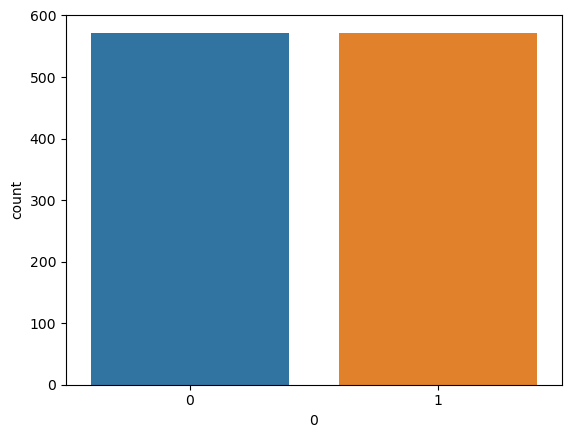

In [119]:
ax = sns.countplot(x=dados_final_teste.iloc[:,-1], data=dados_final_teste)  # plotando a variável target balanceada.

# Modelo Base

In [120]:
from sklearn.dummy import DummyClassifier

In [121]:
dummy = DummyClassifier()
dummy.fit(X, y)

dummy.score(X_teste, y_teste)

0.5

In [122]:
predito_dummy = dummy.predict(X_teste)

# Ávore de Decisão

In [204]:
from sklearn.tree import DecisionTreeClassifier

In [205]:
arvore = DecisionTreeClassifier(max_depth = 3, random_state = 5)
arvore.fit(X, y)

DecisionTreeClassifier(max_depth=3, random_state=5)

In [206]:
arvore.score(X, y)*100

85.513608428446

In [207]:
predito_arvore1 = arvore.predict(X_teste)

In [208]:
arvore.score(X_teste, y_teste)*100

85.4020979020979

In [209]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [210]:
nome_colunas = ['Plano internacional',
       'Plano de correio de voz',
       'Comprimento da conta', 'Código de área',
       'Número de mensagens vmail',
       'Total de minutos do dia',
       'Total de chamadas diárias',
       'Valor total da diária',
       'Total de minutos noturnos',
       'Total de chamadas de véspera',
       'Total da noite',
       'Total de minutos noturnos',
       'Total de chamadas noturnas',
       'Valor total da diária',
       'Total de minutos internacionais',
       'Total de chamadas intl',
       'Total da tarifa internacional',
       'Chamadas de atendimento ao cliente']

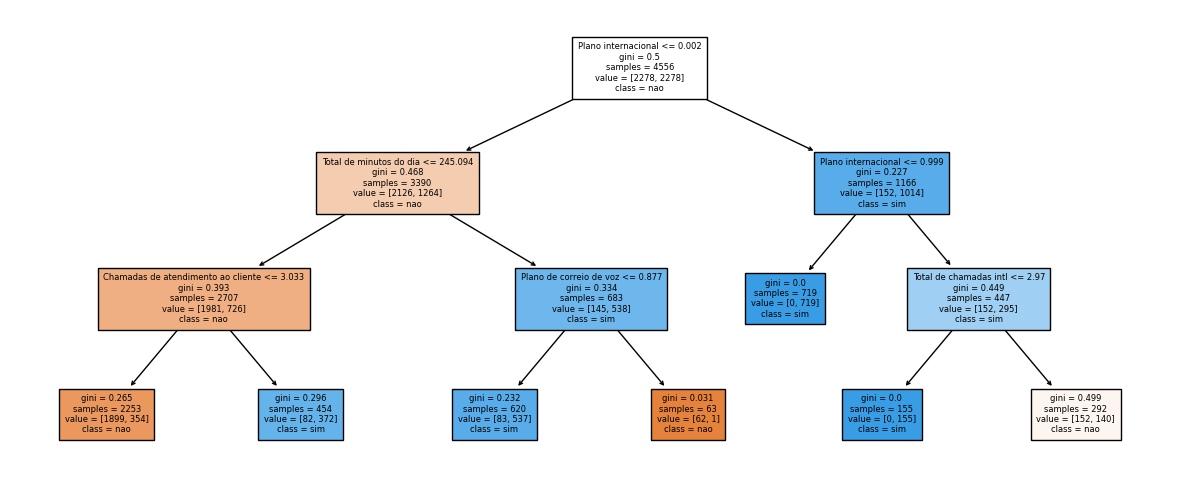

In [211]:
plt.figure(figsize = (15, 6))
plot_tree(arvore, filled = True, class_names = ['nao', 'sim'], fontsize  = 6, feature_names = nome_colunas );

In [212]:
arvore = DecisionTreeClassifier(max_depth = 4, random_state = 5)
arvore.fit(X, y)

DecisionTreeClassifier(max_depth=4, random_state=5)

In [213]:
arvore.score(X, y)*100

88.45478489903425

In [214]:
predito_arvore2 = arvore.predict(X_teste)

In [215]:
arvore.score(X_teste, y_teste)*100

88.72377622377621

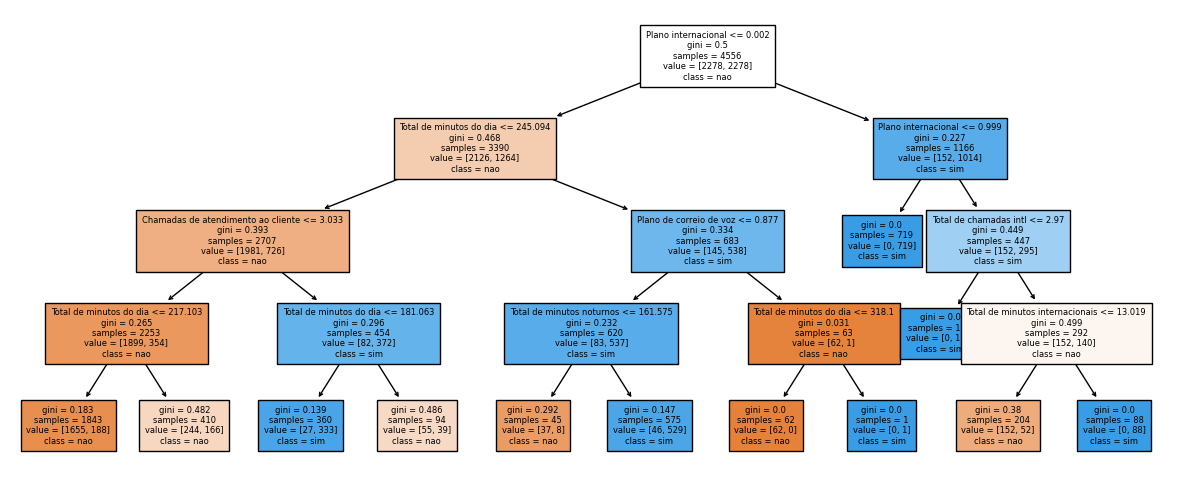

In [216]:
plt.figure(figsize = (15, 6))
plot_tree(arvore, filled = True, class_names = ['nao', 'sim'], fontsize  = 6, feature_names = nome_colunas );

## VALIDAÇÃO CRUZADA COM 10 FOLDS

In [217]:
#import pandas as pd
from sklearn.model_selection import cross_val_score, KFold
#from sklearn.tree import DecisionTreeClassifier
import numpy as np



# 1. Instanciar o modelo
# É uma boa prática definir o random_state para garantir que os resultados sejam reproduzíveis
modelo_arvore = DecisionTreeClassifier(random_state=42)


In [244]:
# 2. Definir a estratégia de validação cruzada
# O parâmetro k define o número de "folds" (partes). Comumente usamos 5 ou 10.
# shuffle=True garante que os dados sejam embaralhados antes de dividir.
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

--- Gerando Gráfico para o FOLD 1 ---


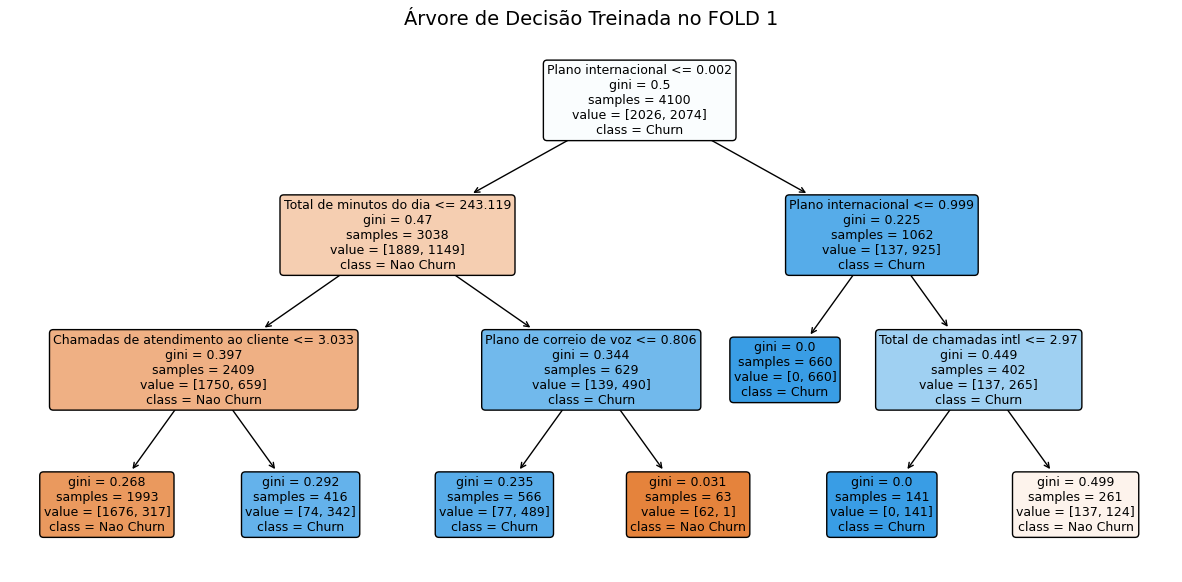

--- Gerando Gráfico para o FOLD 2 ---


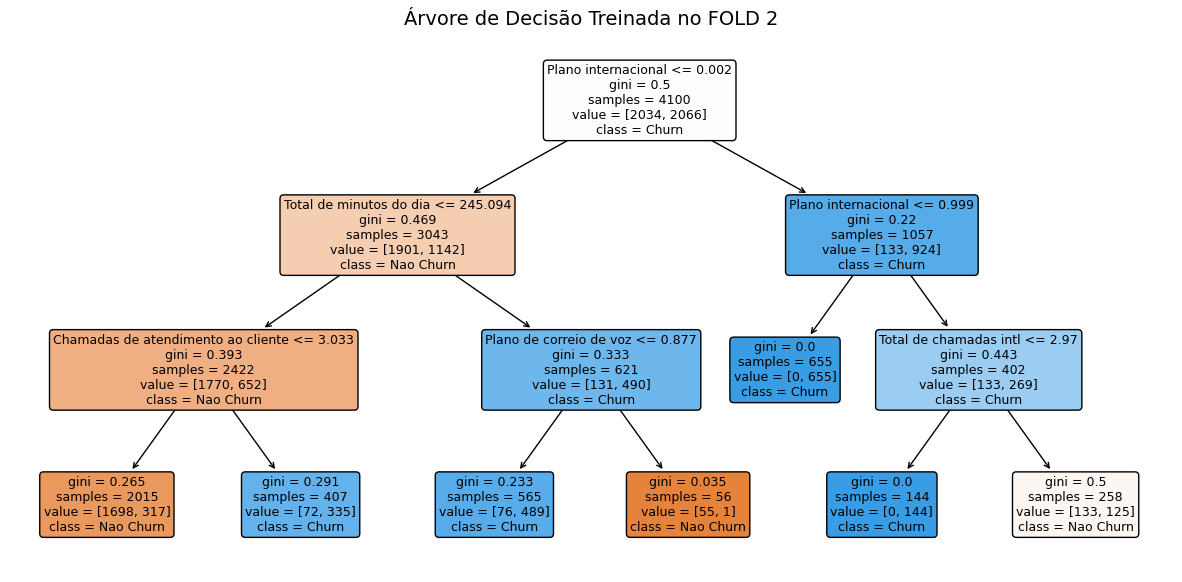

--- Gerando Gráfico para o FOLD 3 ---


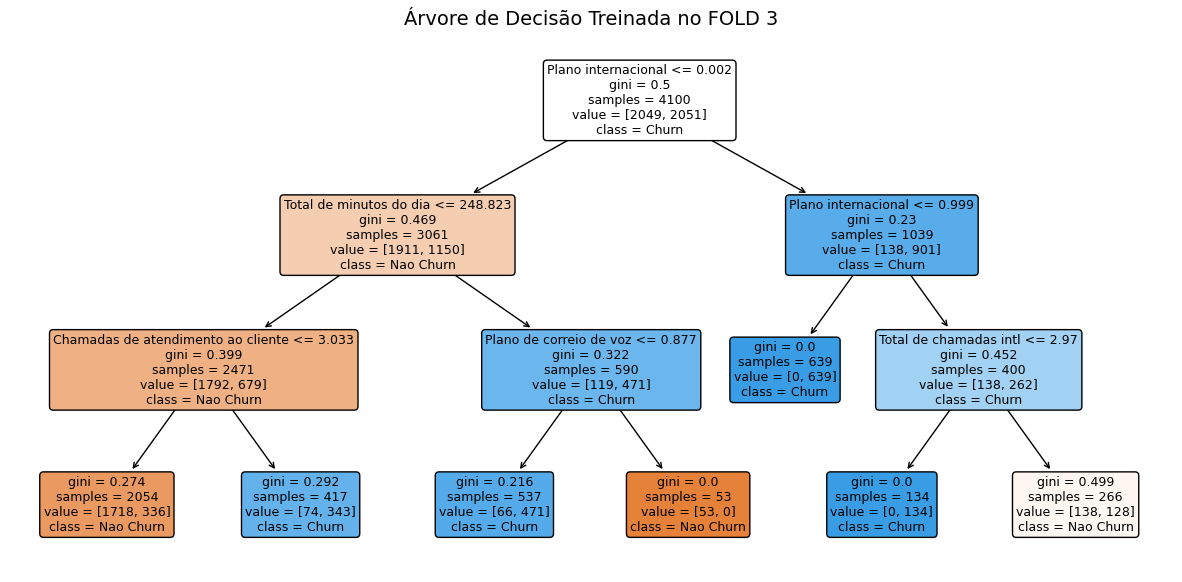

--- Gerando Gráfico para o FOLD 4 ---


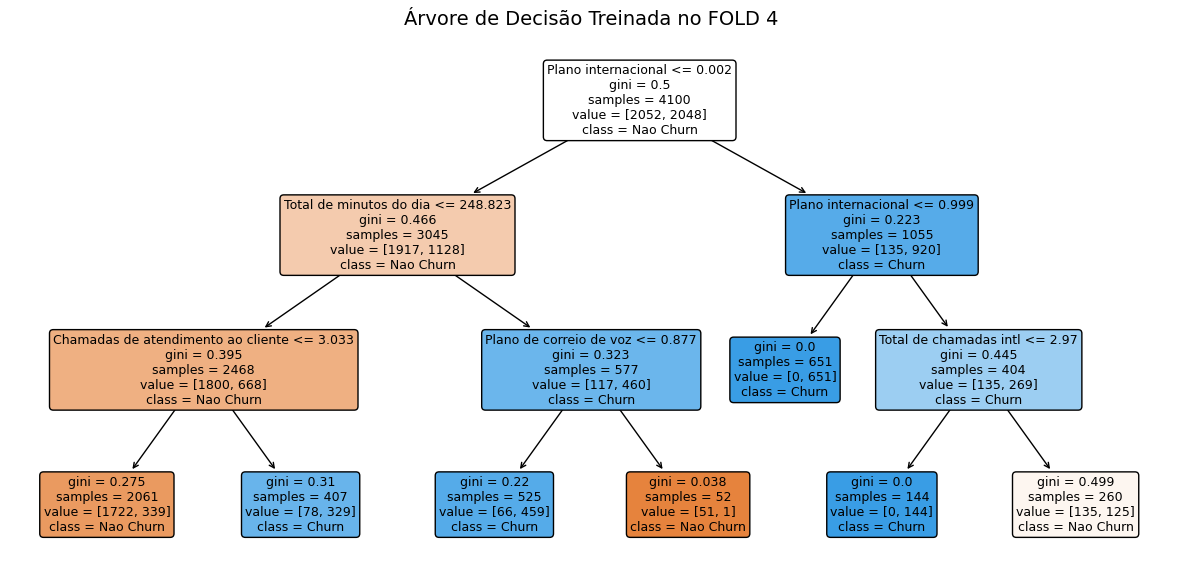

--- Gerando Gráfico para o FOLD 5 ---


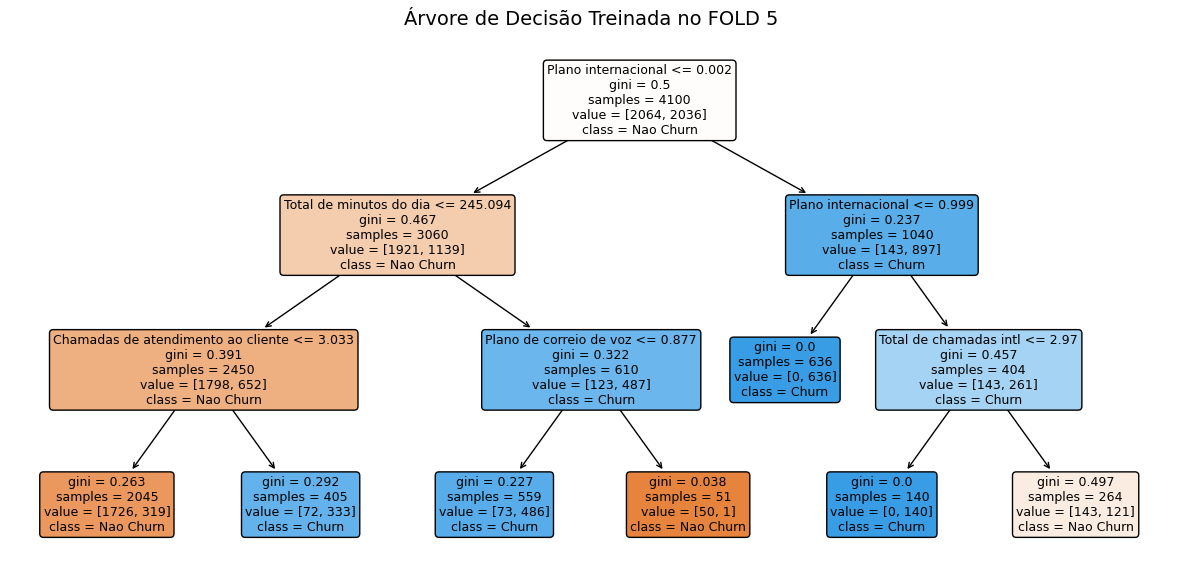

--- Gerando Gráfico para o FOLD 6 ---


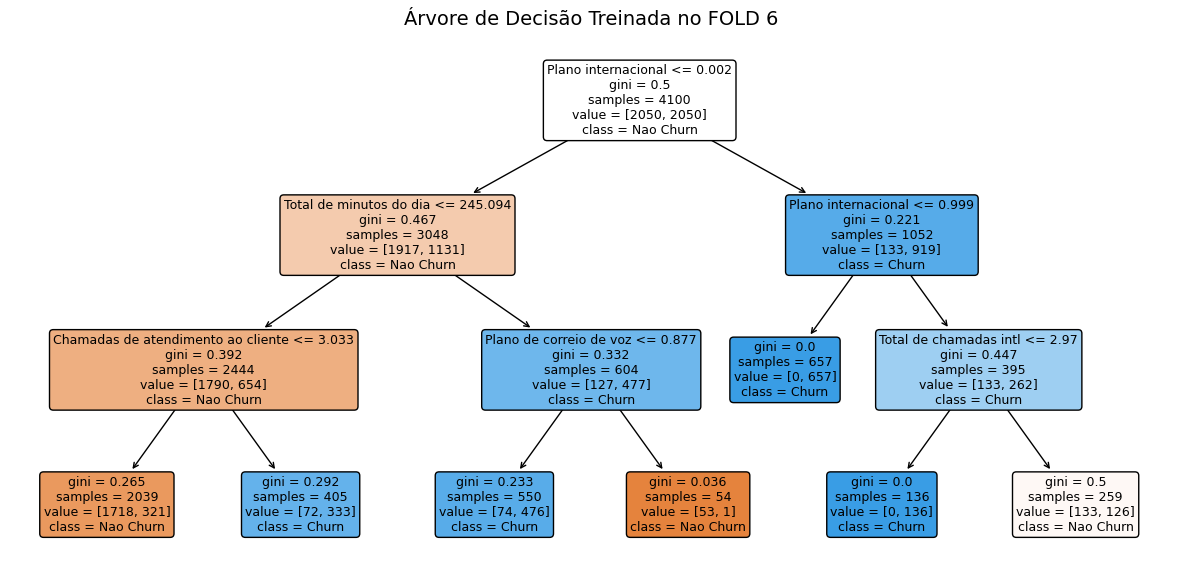

--- Gerando Gráfico para o FOLD 7 ---


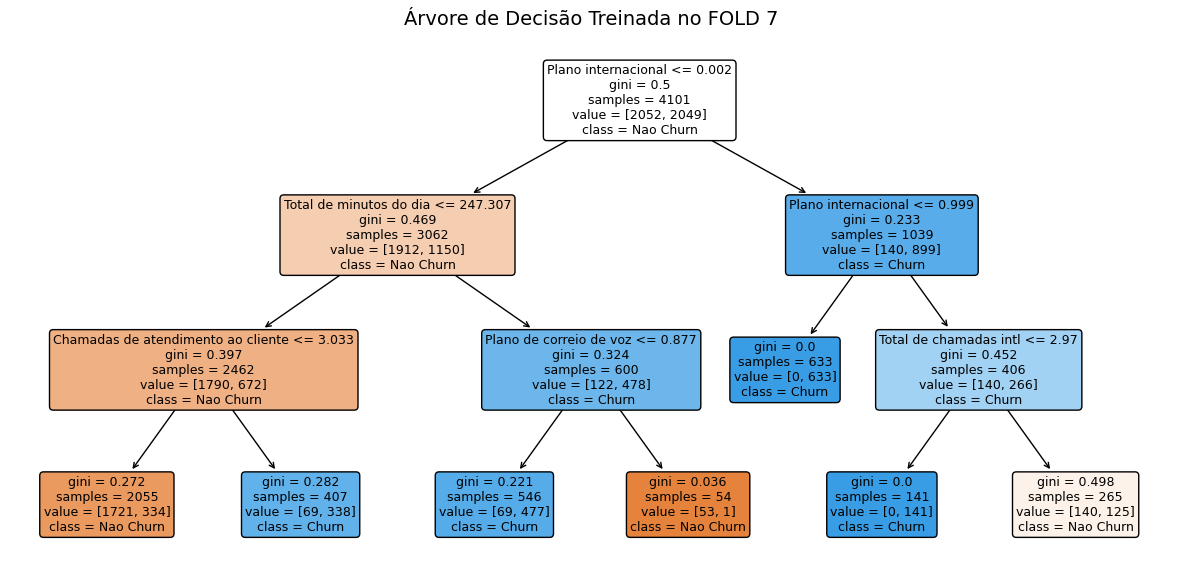

--- Gerando Gráfico para o FOLD 8 ---


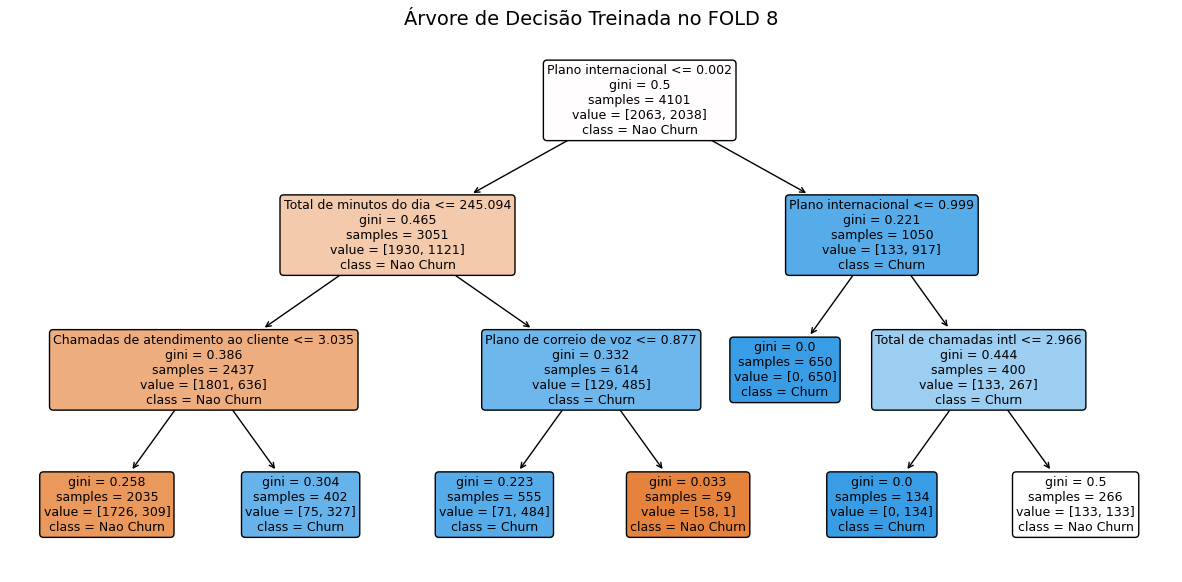

--- Gerando Gráfico para o FOLD 9 ---


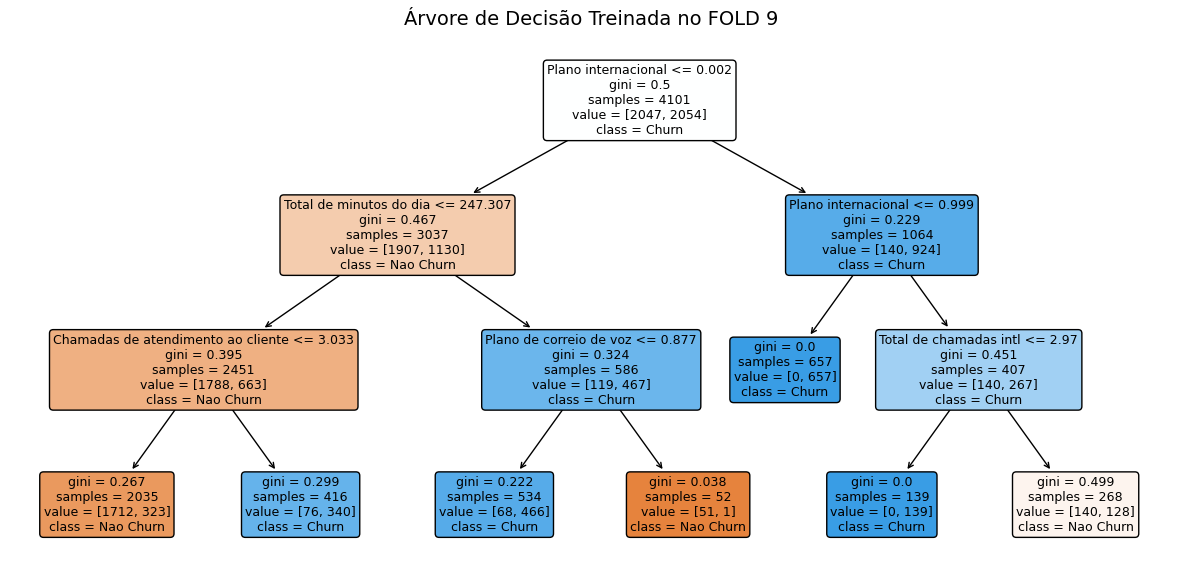

--- Gerando Gráfico para o FOLD 10 ---


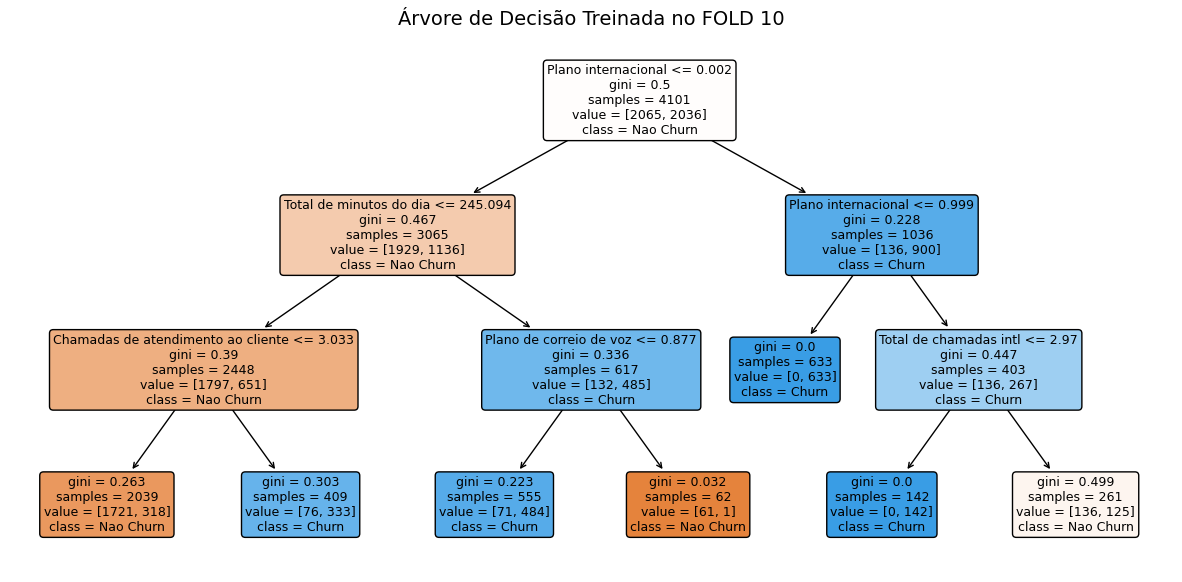

In [242]:
# Variável para contar em qual fold estamos
fold_numero = 1

# Loop para passar por cada fold
for train_index, test_index in kfold.split(X):
    # 1. Separar os dados de treino e teste para ESTE FOLD específico
    X_treino, X_teste = X.iloc[train_index], X.iloc[test_index]
    y_treino, y_teste = y.iloc[train_index], y.iloc[test_index]

    # 2. Treinar um NOVO modelo de árvore APENAS com os dados de treino deste fold
    modelo_do_fold = DecisionTreeClassifier(max_depth=3, random_state=42)
    modelo_do_fold.fit(X_treino, y_treino)

    # 3. PLOTAR a árvore gerada NESTE FOLD
    print(f"--- Gerando Gráfico para o FOLD {fold_numero} ---")
    plt.figure(figsize=(15, 7))
    plot_tree(
        modelo_do_fold,
        feature_names=nome_colunas,
        class_names=['Nao Churn', 'Churn'],
        filled=True,
        rounded=True,
        fontsize=9
    )
    plt.title(f"Árvore de Decisão Treinada no FOLD {fold_numero}", fontsize=14)
    plt.show()

    fold_numero += 1

In [239]:
# 3. Aplicar a validação cruzada
# A função 'cross_val_score' faz todo o trabalho para você:
#   - estimator: o modelo que você quer treinar.
#   - X: suas features.
#   - y: sua variável alvo.
#   - cv: a estratégia de validação (que definimos acima).
#   - scoring: a métrica que você quer calcular. 'accuracy' é a padrão.
scores = cross_val_score(modelo_arvore, X, y, cv=kfold, scoring='accuracy')

In [240]:
# 4. Analisar os resultados
print("Resultados de Acurácia para cada um dos 10 folds:")
print(scores)
print("-" * 50)
print(f"Acurácia Média: {np.mean(scores) * 100:.2f}%")
print(f"Desvio Padrão: {np.std(scores) * 100:.2f}%")

Resultados de Acurácia para cada um dos 10 folds:
[0.93421053 0.95175439 0.95833333 0.92982456 0.93859649 0.94517544
 0.93406593 0.91868132 0.95164835 0.93846154]
--------------------------------------------------
Acurácia Média: 94.01%
Desvio Padrão: 1.13%


In [246]:
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

In [248]:

# --- Início do Código de Validação Cruzada Manual ---


# Listas para guardar os scores de cada fold
lista_acuracia = []
lista_precisao = []
lista_recall = []
lista_f1 = []

fold_numero = 1
for train_index, test_index in kfold.split(X):
    # Separar dados de treino e teste do fold atual
    X_treino, X_teste = X.iloc[train_index], X.iloc[test_index]
    y_treino, y_teste = y.iloc[train_index], y.iloc[test_index]

    # Treinar o modelo
    modelo = DecisionTreeClassifier(random_state=42)
    modelo.fit(X_treino, y_treino)

    # Fazer previsões nos dados de teste
    y_previsoes = modelo.predict(X_teste)

    # --- Calcular e Imprimir as Métricas para o Fold Atual ---
    print(f"========== MÉTRICAS PARA O FOLD {fold_numero} ==========")

    # 1. Acurácia (Accuracy)
    acuracia = accuracy_score(y_teste, y_previsoes)
    lista_acuracia.append(acuracia)
    print(f"Acurácia: {acuracia:.4f}")

    # 2. Precisão (Precision)
    precisao = precision_score(y_teste, y_previsoes)
    lista_precisao.append(precisao)
    print(f"Precisão: {precisao:.4f}")

    # 3. Recall (Sensibilidade)
    recall = recall_score(y_teste, y_previsoes)
    lista_recall.append(recall)
    print(f"Recall: {recall:.4f}")

    # 4. F1-Score
    f1 = f1_score(y_teste, y_previsoes)
    lista_f1.append(f1)
    print(f"F1-Score: {f1:.4f}")

    # 5. Matriz de Confusão
    print("\nMatriz de Confusão:")
    cm = confusion_matrix(y_teste, y_previsoes)
    print(cm)
    
    # (Opcional) Relatório de Classificação Completo
    # print("\nRelatório de Classificação Completo:")
    # print(classification_report(y_teste, y_previsoes))
    
    print("=" * 40 + "\n")
    fold_numero += 1


# --- Imprimir as Médias Finais ---
print("========== MÉDIAS FINAIS (3 FOLDS) ==========")
print(f"Acurácia Média: {np.mean(lista_acuracia):.4f}")
print(f"Precisão Média: {np.mean(lista_precisao):.4f}")
print(f"Recall Médio: {np.mean(lista_recall):.4f}")
print(f"F1-Score Médio: {np.mean(lista_f1):.4f}")
print("=" * 40)

========== MÉTRICAS PARA O FOLD 1 ==========
Acurácia: 0.9342
Precisão: 0.9065
Recall: 0.9510
F1-Score: 0.9282

Matriz de Confusão:
[[232  20]
 [ 10 194]]

========== MÉTRICAS PARA O FOLD 2 ==========
Acurácia: 0.9518
Precisão: 0.9524
Recall: 0.9434
F1-Score: 0.9479

Matriz de Confusão:
[[234  10]
 [ 12 200]]

========== MÉTRICAS PARA O FOLD 3 ==========
Acurácia: 0.9583
Precisão: 0.9727
Recall: 0.9427
F1-Score: 0.9575

Matriz de Confusão:
[[223   6]
 [ 13 214]]

========== MÉTRICAS PARA O FOLD 4 ==========
Acurácia: 0.9298
Precisão: 0.9160
Recall: 0.9478
F1-Score: 0.9316

Matriz de Confusão:
[[206  20]
 [ 12 218]]

========== MÉTRICAS PARA O FOLD 5 ==========
Acurácia: 0.9386
Precisão: 0.9280
Recall: 0.9587
F1-Score: 0.9431

Matriz de Confusão:
[[196  18]
 [ 10 232]]

========== MÉTRICAS PARA O FOLD 6 ==========
Acurácia: 0.9452
Precisão: 0.9319
Recall: 0.9605
F1-Score: 0.9460

Matriz de Confusão:
[[212  16]
 [  9 219]]

========== MÉTRICAS PARA O FOLD 7 ==========
Acurácia: 0.9341
Pr

## VALIDAÇÃO CRUZADA COM 3 FOLDS

--- Gerando Gráfico para o FOLD 1 ---


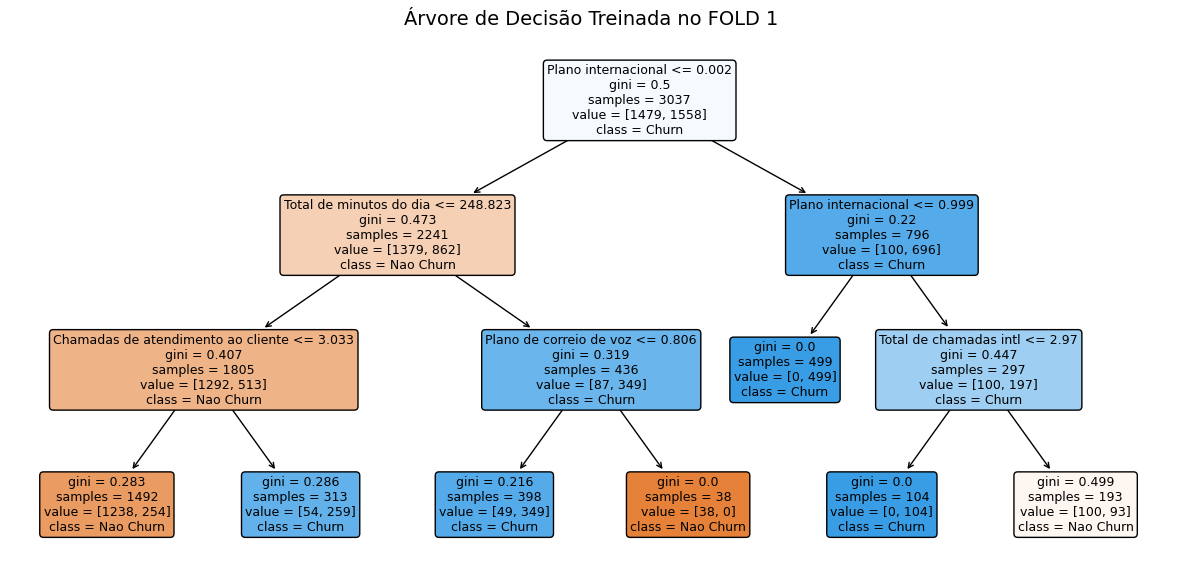

--- Gerando Gráfico para o FOLD 2 ---


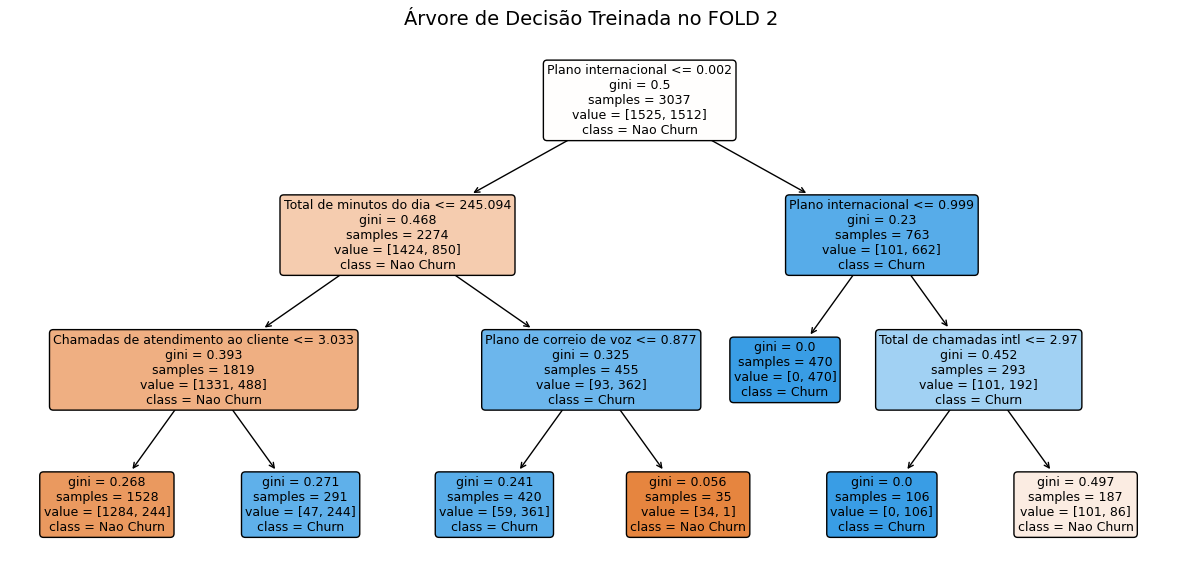

--- Gerando Gráfico para o FOLD 3 ---


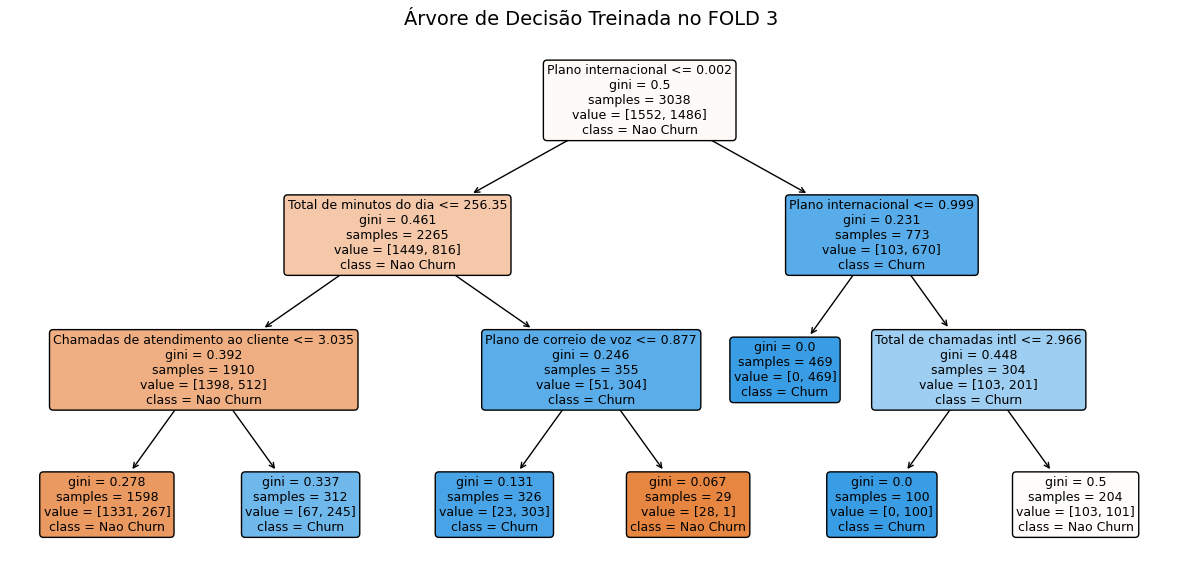

In [227]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt

# Vamos fazer uma validação cruzada manual com 3 folds (partes)
kfold = KFold(n_splits=3, shuffle=True, random_state=42)

# Variável para contar em qual fold estamos
fold_numero = 1

# Loop para passar por cada fold
for train_index, test_index in kfold.split(X):
    # 1. Separar os dados de treino e teste para ESTE FOLD específico
    X_treino, X_teste = X.iloc[train_index], X.iloc[test_index]
    y_treino, y_teste = y.iloc[train_index], y.iloc[test_index]

    # 2. Treinar um NOVO modelo de árvore APENAS com os dados de treino deste fold
    modelo_do_fold = DecisionTreeClassifier(max_depth=3, random_state=42)
    modelo_do_fold.fit(X_treino, y_treino)

    # 3. PLOTAR a árvore gerada NESTE FOLD
    print(f"--- Gerando Gráfico para o FOLD {fold_numero} ---")
    plt.figure(figsize=(15, 7))
    plot_tree(
        modelo_do_fold,
        feature_names=nome_colunas,
        class_names=['Nao Churn', 'Churn'],
        filled=True,
        rounded=True,
        fontsize=9
    )
    plt.title(f"Árvore de Decisão Treinada no FOLD {fold_numero}", fontsize=14)
    plt.show()

    fold_numero += 1



In [228]:
scores = cross_val_score(modelo_arvore, X, y, cv=kfold, scoring='accuracy')

In [229]:
# 4. Analisar os resultados
print("Resultados de Acurácia para cada um dos 3 folds:")
print(scores)
print("-" * 50)
print(f"Acurácia Média: {np.mean(scores) * 100:.2f}%")
print(f"Desvio Padrão: {np.std(scores) * 100:.2f}%")

Resultados de Acurácia para cada um dos 3 folds:
[0.93943384 0.93087558 0.92424242]
--------------------------------------------------
Acurácia Média: 93.15%
Desvio Padrão: 0.62%


# BNB

In [136]:
from sklearn.naive_bayes import BernoulliNB


In [137]:
bnb = BernoulliNB(binarize = 0.44)

In [138]:
bnb.fit(X, y)

BernoulliNB(binarize=0.44)

In [139]:
bnb.score(X, y)*100

60.95258999122037

In [140]:
predito_bnb = bnb.predict(X_teste)

In [141]:
bnb.score(X_teste, y_teste)*100

58.65384615384615

# KNN

## Normalizando os Dados de Treino

In [142]:
from sklearn.preprocessing import MinMaxScaler

In [143]:
normalizacao = MinMaxScaler()

x_treino_normalizado = normalizacao.fit_transform(X)

In [144]:
pd.DataFrame(x_treino_normalizado)

0         1         2         3         4         5         6   \
0     0.000000  1.000000  0.524793  0.068627  0.500000  0.755701  0.687500   
1     0.000000  1.000000  0.438017  0.068627  0.520000  0.460661  0.768750   
2     0.000000  0.000000  0.561983  0.068627  0.000000  0.693843  0.712500   
3     1.000000  0.000000  0.342975  0.000000  0.000000  0.853478  0.443750   
4     1.000000  0.000000  0.305785  0.068627  0.000000  0.475200  0.706250   
...        ...       ...       ...       ...       ...       ...       ...   
4551  1.000000  0.340954  0.521125  0.068627  0.286402  0.380260  0.583095   
4552  0.592822  0.000000  0.284209  0.068627  0.000000  0.489294  0.637539   
4553  0.000000  0.000000  0.340674  0.060375  0.000000  0.473186  0.502294   
4554  0.000000  0.000000  0.311048  0.062368  0.000000  0.774506  0.606250   
4555  0.000000  0.000000  0.636500  0.068627  0.000000  0.988010  0.491810   

            7         8         9         10        11        12        13  \
0     0.755701  0.542755  0.582353  0.542866  0.572161  0.436090  0.572152   
1     0.460597  0.537531  0.605882  0.537690  0.599772  0.526316  0.600000   
2     0.693830  0.333242  0.647059  0.333225  0.338457  0.533835  0.338608   
3     0.853454  0.170195  0.517647  0.170171  0.436095  0.421053  0.436076   
4     0.475184  0.407754  0.717647  0.407959  0.407629  0.661654  0.407595   
...        ...       ...       ...       ...       ...       ...       ...   
4551  0.380285  0.399553  0.652146  0.399698  0.531639  0.358339  0.531691   
4552  0.489242  0.447039  0.533780  0.447113  0.402774  0.512990  0.402691   
4553  0.473193  0.370057  0.480268  0.370045  0.409805  0.476064  0.409622   
4554  0.774471  0.643516  0.533608  0.643489  0.551476  0.526267  0.551686   
4555  0.987998  0.600911  0.588535  0.600911  0.593140  0.508198  0.593503   

            14        15        16        17  
0     0.500000  0.150000  0.500000  0.111111  
1     0.685000  0.150000  0.685185  0.111111  
2     0.610000  0.250000  0.609259  0.000000  
3     0.330000  0.350000  0.329630  0.222222  
4     0.505000  0.150000  0.505556  0.333333  
...        ...       ...       ...       ...  
4551  0.637162  0.151143  0.636914  0.260106  
4552  0.627067  0.272153  0.626847  0.423817  
4553  0.461583  0.074050  0.461908  0.639944  
4554  0.377247  0.104560  0.377416  0.030402  
4555  0.488028  0.420483  0.488611  0.127509  

[4556 rows x 18 columns]

## Normalizando os Dados de Teste

In [145]:
#Transformação dos Dados de Teste
x_teste_normalizado = normalizacao.fit_transform(X_teste)

In [146]:
pd.DataFrame(x_teste_normalizado)

0         1         2         3         4         5         6   \
0     0.000000  0.000000  0.502165  0.000000  0.000000  0.514267  0.496296   
1     0.000000  0.000000  0.277056  0.068627  0.000000  0.334630  0.792593   
2     0.000000  0.000000  0.692641  0.068627  0.000000  0.995460  0.274074   
3     0.000000  0.000000  0.476190  0.068627  0.000000  0.273995  0.540741   
4     0.000000  0.000000  0.207792  1.000000  0.000000  0.302853  0.644444   
...        ...       ...       ...       ...       ...       ...       ...   
1139  0.244660  0.000000  0.617762  1.000000  0.000000  0.504920  0.526242   
1140  0.000000  0.338582  0.391860  0.023236  0.205805  0.198750  0.619248   
1141  0.000000  0.000000  0.289965  0.029947  0.000000  0.760452  0.444712   
1142  1.000000  0.000000  0.476939  0.000000  0.000000  0.320284  0.601237   
1143  0.252674  0.252674  0.588467  0.017340  0.074316  0.453726  0.354159   

            7         8         9         10        11        12        13  \
0     0.514400  0.967485  0.328244  0.967742  0.559071  0.360902  0.558994   
1     0.334732  0.575072  0.351145  0.575019  0.538752  0.518797  0.539007   
2     0.995422  0.859739  0.458015  0.859715  0.398839  0.646617  0.399097   
3     0.274080  0.284348  0.496183  0.284321  0.483019  0.473684  0.482914   
4     0.302880  0.532356  0.549618  0.532258  0.451379  0.360902  0.451322   
...        ...       ...       ...       ...       ...       ...       ...   
1139  0.505016  0.699159  0.430727  0.699269  0.427819  0.622381  0.427852   
1140  0.198806  0.671488  0.351626  0.671601  0.484893  0.396187  0.484681   
1141  0.760546  0.456934  0.700902  0.456797  0.658526  0.491046  0.658462   
1142  0.320376  0.520278  0.274400  0.520298  0.306767  0.322456  0.306634   
1143  0.453823  0.518078  0.494499  0.518273  0.326008  0.499960  0.326171   

            14        15        16        17  
0     0.475410  0.222222  0.475709  0.125000  
1     0.693989  0.333333  0.694332  0.500000  
2     0.295082  0.500000  0.295547  0.500000  
3     0.420765  0.333333  0.421053  0.250000  
4     0.606557  0.055556  0.607287  0.125000  
...        ...       ...       ...       ...  
1139  0.621433  0.165480  0.621968  0.125000  
1140  0.706252  0.441820  0.707338  0.667323  
1141  0.766514  0.294951  0.766909  0.179547  
1142  0.736760  0.172962  0.737627  0.264165  
1143  0.548917  0.319296  0.549836  0.531584  

[1144 rows x 18 columns]

## Criando,  Treino e Fazendo Previsões com o Modelo

In [147]:
from sklearn.neighbors import KNeighborsClassifier 

In [148]:
#Inicialização do modelo
knn = KNeighborsClassifier()

#Ajuste do Modelo
knn.fit(x_treino_normalizado, y)

KNeighborsClassifier()

In [149]:
knn.score(x_treino_normalizado, y)*100

c:\Users\engra\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.



94.11764705882352

In [150]:
#Avaliação do Desempenho
knn.score(x_teste_normalizado, y_teste)*100

c:\Users\engra\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.



83.65384615384616

In [151]:
predito_knn = knn.predict(x_teste_normalizado)

c:\Users\engra\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.



# Validação de Modelos

In [152]:
from sklearn.metrics import confusion_matrix


In [153]:
print(confusion_matrix(y_teste, predito_dummy))

[[572   0]
 [572   0]]


In [154]:
print(confusion_matrix(y_teste, predito_knn))

[[478  94]
 [ 93 479]]


In [155]:
print(confusion_matrix(y_teste, predito_bnb))

[[249 323]
 [150 422]]


In [156]:
print(confusion_matrix(y_teste, predito_arvore1))

[[533  39]
 [128 444]]


In [157]:
print(confusion_matrix(y_teste, predito_arvore2))

[[551  21]
 [108 464]]


In [158]:
from sklearn.metrics import accuracy_score

acuracia = accuracy_score(y_teste, predito_dummy) *100

print('A acuracia Dummy foi %.2f' % acuracia)

A acuracia Dummy foi 50.00


In [159]:
acuracia = accuracy_score(y_teste, predito_knn) *100

print('A acuracia KNN foi %.2f' % acuracia)

A acuracia KNN foi 83.65


In [160]:
acuracia = accuracy_score(y_teste, predito_bnb) *100

print('A acuracia BNB foi %.2f' % acuracia)

A acuracia BNB foi 58.65


In [161]:
acuracia = accuracy_score(y_teste, predito_arvore1) *100

print('A acuracia Árvore foi %.2f' % acuracia)

A acuracia Árvore foi 85.40


In [162]:
acuracia = accuracy_score(y_teste, predito_arvore2) *100

print('A acuracia Árvore foi %.2f' % acuracia)

A acuracia Árvore foi 88.72


In [163]:
from sklearn.metrics import precision_score

precisao = precision_score(y_teste, predito_dummy) *100

print('A Precisão Dummy  foi %.2f' % precisao)

A Precisão Dummy  foi 0.00


c:\Users\engra\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.



In [164]:


precisao = precision_score(y_teste, predito_knn) *100

print('A Precisão KNN foi %.2f' % precisao)

A Precisão KNN foi 83.60


In [165]:
precisao = precision_score(y_teste, predito_bnb) *100

print('A Precisão BNB foi %.2f' % precisao)

A Precisão BNB foi 56.64


In [166]:
precisao = precision_score(y_teste, predito_arvore1) *100

print('A Precisão Árvore  foi %.2f' % precisao)

A Precisão Árvore  foi 91.93


In [167]:
precisao = precision_score(y_teste, predito_arvore2) *100

print('A Precisão Árvore foi %.2f' % precisao)

A Precisão Árvore foi 95.67


In [168]:
from sklearn.metrics import recall_score

recall = recall_score(y_teste, predito_dummy) *100

print('O Recall Dummy foi %.2f' % recall)

O Recall Dummy foi 0.00


In [169]:
recall = recall_score(y_teste, predito_knn) *100

print('O Recall KNN foi %.2f' % recall)

O Recall KNN foi 83.74


In [170]:
recall = recall_score(y_teste, predito_bnb) *100

print('O Recall BNB foi %.2f' % recall)

O Recall BNB foi 73.78


In [171]:
recall = recall_score(y_teste, predito_arvore1) *100

print('O Recall Árvore foi %.2f' % recall)

O Recall Árvore foi 77.62


In [172]:
recall = recall_score(y_teste, predito_arvore2) *100

print('O Recall Árvore foi %.2f' % recall)

O Recall Árvore foi 81.12


In [173]:
from sklearn.metrics import f1_score

f1 = f1_score(y_teste, predito_dummy) *100

print('O F1 Dummy foi %.2f' % f1)

O F1 Dummy foi 0.00


In [174]:
f1 = f1_score(y_teste, predito_knn) *100

print('O F1 KNN foi %.2f' % f1)

O F1 KNN foi 83.67


In [175]:
f1 = f1_score(y_teste, predito_bnb) *100

print('O F1 BNB foi %.2f' % f1)

O F1 BNB foi 64.09


In [176]:
f1 = f1_score(y_teste, predito_arvore1) *100

print('O F1 Árvore foi %.2f' % f1)

O F1 Árvore foi 84.17


In [177]:
f1 = f1_score(y_teste, predito_arvore2) *100

print('O F1 Árvore foi %.2f' % f1)

O F1 Árvore foi 87.80


In [250]:

# --- Início do Código de Validação Cruzada Manual ---


# Listas para guardar os scores de cada fold
lista_acuracia = []
lista_precisao = []
lista_recall = []
lista_f1 = []

fold_numero = 1
for train_index, test_index in kfold.split(X):
    # Separar dados de treino e teste do fold atual
    X_treino, X_teste = X.iloc[train_index], X.iloc[test_index]
    y_treino, y_teste = y.iloc[train_index], y.iloc[test_index]

    # Treinar o modelo
    modelo = DecisionTreeClassifier(random_state=42)
    modelo.fit(X_treino, y_treino)

    # Fazer previsões nos dados de teste
    y_previsoes = modelo.predict(X_teste)

    # --- Calcular e Imprimir as Métricas para o Fold Atual ---
    print(f"========== MÉTRICAS PARA O FOLD {fold_numero} ==========")

    # 1. Acurácia (Accuracy)
    acuracia = accuracy_score(y_teste, y_previsoes)
    lista_acuracia.append(acuracia)
    print(f"Acurácia: {acuracia:.4f}")

    # 2. Precisão (Precision)
    precisao = precision_score(y_teste, y_previsoes)
    lista_precisao.append(precisao)
    print(f"Precisão: {precisao:.4f}")

    # 3. Recall (Sensibilidade)
    recall = recall_score(y_teste, y_previsoes)
    lista_recall.append(recall)
    print(f"Recall: {recall:.4f}")

    # 4. F1-Score
    f1 = f1_score(y_teste, y_previsoes)
    lista_f1.append(f1)
    print(f"F1-Score: {f1:.4f}")

    # 5. Matriz de Confusão
    print("\nMatriz de Confusão:")
    cm = confusion_matrix(y_teste, y_previsoes)
    print(cm)
    
    # (Opcional) Relatório de Classificação Completo
    # print("\nRelatório de Classificação Completo:")
    # print(classification_report(y_teste, y_previsoes))
    
    print("=" * 40 + "\n")
    fold_numero += 1




========== MÉTRICAS PARA O FOLD 1 ==========
Acurácia: 0.9342
Precisão: 0.9065
Recall: 0.9510
F1-Score: 0.9282

Matriz de Confusão:
[[232  20]
 [ 10 194]]

========== MÉTRICAS PARA O FOLD 2 ==========
Acurácia: 0.9518
Precisão: 0.9524
Recall: 0.9434
F1-Score: 0.9479

Matriz de Confusão:
[[234  10]
 [ 12 200]]

========== MÉTRICAS PARA O FOLD 3 ==========
Acurácia: 0.9583
Precisão: 0.9727
Recall: 0.9427
F1-Score: 0.9575

Matriz de Confusão:
[[223   6]
 [ 13 214]]

========== MÉTRICAS PARA O FOLD 4 ==========
Acurácia: 0.9298
Precisão: 0.9160
Recall: 0.9478
F1-Score: 0.9316

Matriz de Confusão:
[[206  20]
 [ 12 218]]

========== MÉTRICAS PARA O FOLD 5 ==========
Acurácia: 0.9386
Precisão: 0.9280
Recall: 0.9587
F1-Score: 0.9431

Matriz de Confusão:
[[196  18]
 [ 10 232]]

========== MÉTRICAS PARA O FOLD 6 ==========
Acurácia: 0.9452
Precisão: 0.9319
Recall: 0.9605
F1-Score: 0.9460

Matriz de Confusão:
[[212  16]
 [  9 219]]

========== MÉTRICAS PARA O FOLD 7 ==========
Acurácia: 0.9341
Pr

In [249]:
# --- Imprimir as Médias Finais ---
print("========== MÉDIAS FINAIS (3 FOLDS) ==========")
print(f"Acurácia Média: {np.mean(lista_acuracia):.4f}")
print(f"Precisão Média: {np.mean(lista_precisao):.4f}")
print(f"Recall Médio: {np.mean(lista_recall):.4f}")
print(f"F1-Score Médio: {np.mean(lista_f1):.4f}")
print("=" * 40)

========== MÉDIAS FINAIS (3 FOLDS) ==========
Acurácia Média: 0.9401
Precisão Média: 0.9324
Recall Médio: 0.9495
F1-Score Médio: 0.9407


# ANALISANDO OS MODELOS TREINADOS


A Validação cruzada com 3 folds, obteve a acuracia média de 94,01%, precisão média de 93,24%, O Recall médio de 94,95%, O F1 Score médio de 94,07%, obtendo o melhor desempenho entre os modelos treinados.





Taxa de Churn inicial é de 15%(388 churn de 2666 clientes )

Recall médio do modelo é de 94,95%(209 clientes identificados)

Se pretendemos reduzir 19% da taxa de Churn.

O modelo identificou um média de 226 clientes como potenciais canceladores (VP + FP = 209 + 17).
Desses 226, sabemos que 209 realmente cancelariam (precisão média de 93,24%).
Se a empresa criar uma campanha de retenção para esses 226 clientes e conseguir reter, por exemplo, 20% deles, o número de clientes retidos seria: 209 * 0.20 = 42 clientes.
O total de clientes que cancelariam de verdade na base de teste era em média de 388. Reter 42 clientes representaria uma redução de churn de (42 / 388) * 100 ≈ 11%.

Para reduzir o churn em 11%, a empresa precisa reter 20% dos clientes identificados pelo modelo.

